# Importing and installing

In [ ]:
# !pip install yfinance

In [ ]:
# !pip install nasdaq-data-link

In [1]:
import yfinance as yf
import nasdaqdatalink
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

# Downloading data

## Yahoo finances

In [2]:
df_BTC =yf.download("BTC-EUR",)

[*********************100%%**********************]  1 of 1 completed


In [3]:
StandardANDpoor500 =yf.download("^GSPC",)

[*********************100%%**********************]  1 of 1 completed


In [4]:
EURO_USD = yf.download("EURUSD=X",)

[*********************100%%**********************]  1 of 1 completed


## Nasdaq data link

In [5]:
import nasdaqdatalink
Api_key = "zPvskaHieT_jfN_zdWfp"
data = nasdaqdatalink.get('LBMA/GOLD',api_key=Api_key)

In [6]:
data

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN
1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-09-21,1923.40,1915.00,1563.530,1561.30,1804.53,1799.33
2023-09-22,1926.20,1927.35,1573.320,1569.44,1810.82,1807.08
2023-09-25,1922.55,1924.85,1573.220,1575.68,1808.74,1814.94


# Workspace

In [7]:
data.reset_index(inplace=True)
df_BTC.reset_index(inplace=True)
StandardANDpoor500.reset_index(inplace=True)
EURO_USD.reset_index(inplace=True)

These lines of code are used to reset the index of DataFrame objects:

**data.reset_index(inplace=True)**: This code resets the index of the DataFrame named "data" in place.

**df_BTC.reset_index(inplace=True)**: This line resets the index of the DataFrame named "df_BTC" in place.

**StandardANDpoor500.reset_index(inplace=True)**: This code resets the index of the DataFrame named "StandardANDpoor500" in place.

**EURO_USD.reset_index(inplace=True)**: This line resets the index of the DataFrame named "EURO_USD" in place.

In [8]:
df_BTC.columns=["Date","BTC_Open","BTC_High","BTC_Low","BTC_Close","BTC_AdjClose","BTC_Volume"]
# df_BTC

In [9]:
StandardANDpoor500.columns=["Date","ST_Open","ST_High","ST_Low","ST_Close","ST_AdjClose","ST_Volume"]
# StandardANDpoor500

In [10]:
EURO_USD.columns=["Date","EU/US_Open","EU/US_High","EU/US_Low","EU/US_Close","EU/US_AdjClose","EU/US_Volume"]

In order to join the data frames we have previously opened, we use the ".merge" method from a common column ("Date"). 

The merge() function was used because it offers more flexibility in terms of how the join columns can be specified, the type of join (left, right, internal, external, etc.) and other options than ".join".

In [11]:
df = df_BTC.merge(StandardANDpoor500, on="Date",how="left")
df = df.merge(data, on="Date",how="left")
df = df.merge(EURO_USD, on="Date",how="left")

In [12]:
df.head()

,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ST_Open,ST_High,ST_Low,...,GBP (AM),GBP (PM),EURO (AM),EURO (PM),EU/US_Open,EU/US_High,EU/US_Low,EU/US_Close,EU/US_AdjClose,EU/US_Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,1999.300049,2010.739990,1993.290039,...,758.729,756.519,954.237,953.704,1.295908,1.298000,1.294090,1.295908,1.295908,0.0
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,2003.069946,2012.339966,2003.069946,...,749.985,744.571,949.608,946.491,1.285017,1.292689,1.285017,1.285000,1.285000,0.0
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,2012.739990,2019.260010,2006.589966,...,745.381,746.344,949.220,948.853,1.292140,1.292959,1.283203,1.292006,1.292006,0.0
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.to_csv("df.csv")

# Data frame analysis

Once we have the 3 DFs joined, we use the ".describe()" method to see a statistical summary of the last 30 days of the resulting DataFrame (df). 

In addition, we take the opportunity to study the mean, standard deviation and total number of null values, which can be seen in the subsequent cells.

In [14]:
stats_summary = df.iloc[-30:,].describe()
stats_summary

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ST_Open,ST_High,ST_Low,ST_Close,...,GBP (AM),GBP (PM),EURO (AM),EURO (PM),EU/US_Open,EU/US_High,EU/US_Low,EU/US_Close,EU/US_AdjClose,EU/US_Volume
count,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,20.000000,20.000000,20.000000,20.000000,...,21.000000,21.000000,21.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0
mean,24544.327409,24860.488932,24276.524023,24566.548307,24566.548307,1.164311e+10,4440.122461,4452.615454,4416.838477,4430.834009,...,1546.972857,1546.232857,1796.571905,1796.240476,1.071061,1.073627,1.067568,1.071212,1.071212,0.0
std,554.077830,569.124309,550.992930,549.281848,549.281848,4.344633e+09,74.752783,75.091873,81.373073,79.509560,...,15.246969,15.266875,9.654735,10.069459,0.009781,0.010147,0.009208,0.009475,0.009475,0.0
min,23410.583984,24074.427734,23192.755859,23412.441406,23412.441406,5.119273e+09,4282.629883,4292.069824,4238.629883,4273.529785,...,1527.640000,1528.630000,1777.000000,1779.870000,1.050862,1.054407,1.049428,1.054185,1.054185,0.0
25%,24048.725098,24220.343262,23882.720215,24046.287598,24046.287598,9.384232e+09,4419.502319,4431.312622,4383.327393,4386.010132,...,1533.580000,1532.840000,1791.280000,1790.740000,1.065516,1.067712,1.062299,1.065516,1.065516,0.0
50%,24595.047852,24942.174805,24228.795898,24731.709961,24731.709961,1.104309e+10,4457.729980,4476.459961,4444.794922,4455.510010,...,1539.840000,1540.050000,1797.150000,1795.010000,1.070797,1.073814,1.068200,1.070797,1.070797,0.0
75%,24931.841309,25208.842285,24780.581543,24933.640137,24933.640137,1.297148e+10,4492.257568,4501.482544,4470.590088,4489.802490,...,1560.990000,1560.500000,1804.530000,1804.240000,1.075254,1.076473,1.071048,1.075254,1.075254,0.0
max,25508.662109,25887.892578,25169.361328,25509.867188,25509.867188,2.701963e+10,4530.600098,4541.250000,4507.390137,4515.770020,...,1573.320000,1575.680000,1810.820000,1814.940000,1.093255,1.094547,1.085611,1.093255,1.093255,0.0


In [15]:
stats_summary.loc["mean"]

BTC_Open          2.454433e+04
BTC_High          2.486049e+04
BTC_Low           2.427652e+04
BTC_Close         2.456655e+04
BTC_AdjClose      2.456655e+04
BTC_Volume        1.164311e+10
ST_Open           4.440122e+03
ST_High           4.452615e+03
ST_Low            4.416838e+03
ST_Close          4.430834e+03
ST_AdjClose       4.430834e+03
ST_Volume         3.639063e+09
USD (AM)          1.924948e+03
USD (PM)          1.923902e+03
GBP (AM)          1.546973e+03
GBP (PM)          1.546233e+03
EURO (AM)         1.796572e+03
EURO (PM)         1.796240e+03
EU/US_Open        1.071061e+00
EU/US_High        1.073627e+00
EU/US_Low         1.067568e+00
EU/US_Close       1.071212e+00
EU/US_AdjClose    1.071212e+00
EU/US_Volume      0.000000e+00
Name: mean, dtype: float64

In [16]:
stats_summary.loc["std"]

BTC_Open          5.540778e+02
BTC_High          5.691243e+02
BTC_Low           5.509929e+02
BTC_Close         5.492818e+02
BTC_AdjClose      5.492818e+02
BTC_Volume        4.344633e+09
ST_Open           7.475278e+01
ST_High           7.509187e+01
ST_Low            8.137307e+01
ST_Close          7.950956e+01
ST_AdjClose       7.950956e+01
ST_Volume         8.102693e+08
USD (AM)          1.233132e+01
USD (PM)          1.494160e+01
GBP (AM)          1.524697e+01
GBP (PM)          1.526687e+01
EURO (AM)         9.654735e+00
EURO (PM)         1.006946e+01
EU/US_Open        9.780994e-03
EU/US_High        1.014673e-02
EU/US_Low         9.207695e-03
EU/US_Close       9.475052e-03
EU/US_AdjClose    9.475052e-03
EU/US_Volume      0.000000e+00
Name: std, dtype: float64

In [17]:
df.isna().sum()

Date                 0
BTC_Open             0
BTC_High             0
BTC_Low              0
BTC_Close            0
BTC_AdjClose         0
BTC_Volume           0
ST_Open           1026
ST_High           1026
ST_Low            1026
ST_Close          1026
ST_AdjClose       1026
ST_Volume         1026
USD (AM)          1018
USD (PM)          1036
GBP (AM)          1018
GBP (PM)          1036
EURO (AM)         1018
EURO (PM)         1036
EU/US_Open         945
EU/US_High         945
EU/US_Low          945
EU/US_Close        945
EU/US_AdjClose     945
EU/US_Volume       945
dtype: int64

The following line of code is used to select rows in "df" where the value in the "ST_Open" column is NaN (Not a number) or null.

In [18]:
df.loc[df["ST_Open"].isna()==True]

,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ST_Open,ST_High,ST_Low,...,GBP (AM),GBP (PM),EURO (AM),EURO (PM),EU/US_Open,EU/US_High,EU/US_Low,EU/US_Close,EU/US_AdjClose,EU/US_Volume
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2014-09-27,318.211639,320.630005,313.335449,315.029175,315.029175,11850891,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2014-09-28,314.990540,316.209595,295.214508,297.578705,297.578705,18629822,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2014-10-04,287.568512,291.240112,260.396301,262.777466,262.777466,37743907,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,2023-09-16,24948.927734,25153.759766,24606.507812,24936.523438,24936.523438,10758314752,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3287,2023-09-17,24934.185547,25073.419922,24810.191406,24898.650391,24898.650391,6936865556,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3293,2023-09-23,24918.466797,25111.501953,24866.294922,24924.990234,24924.990234,9920219726,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3294,2023-09-24,24924.041016,24976.207031,24869.617188,24924.822266,24924.822266,6943757707,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Synthetic data generation

The next code is focused on data visualization and analysis using Python's Matplotlib and Seaborn libraries. 

It begins by extracting specific columns from a DataFrame named "df," including "Date," "BTC_AdjClose," and "ST_AdjClose." It then creates a 2x1 subplot figure, displaying scatterplots of "Date" against "BTC_AdjClose" and "ST_AdjClose" in separate subplots. 

Additionally, a scatterplot is generated to visualize the relationship between "BTC_AdjClose" and "ST_AdjClose," with an overlaid black line plot based on mathematical transformations. 

The code calculates daily BTC returns using a loop and stores them in a new column called "BTC_Return." Further, it determines and rounds the minimum and maximum returns and concludes with a histogram plot of "BTC_Return" values, specifying bin settings and custom tick marks on the x-axis for enhanced data analysis.

In [19]:
x = df["Date"]
y_BTC = df["BTC_AdjClose"]
y_St = df["ST_AdjClose"]

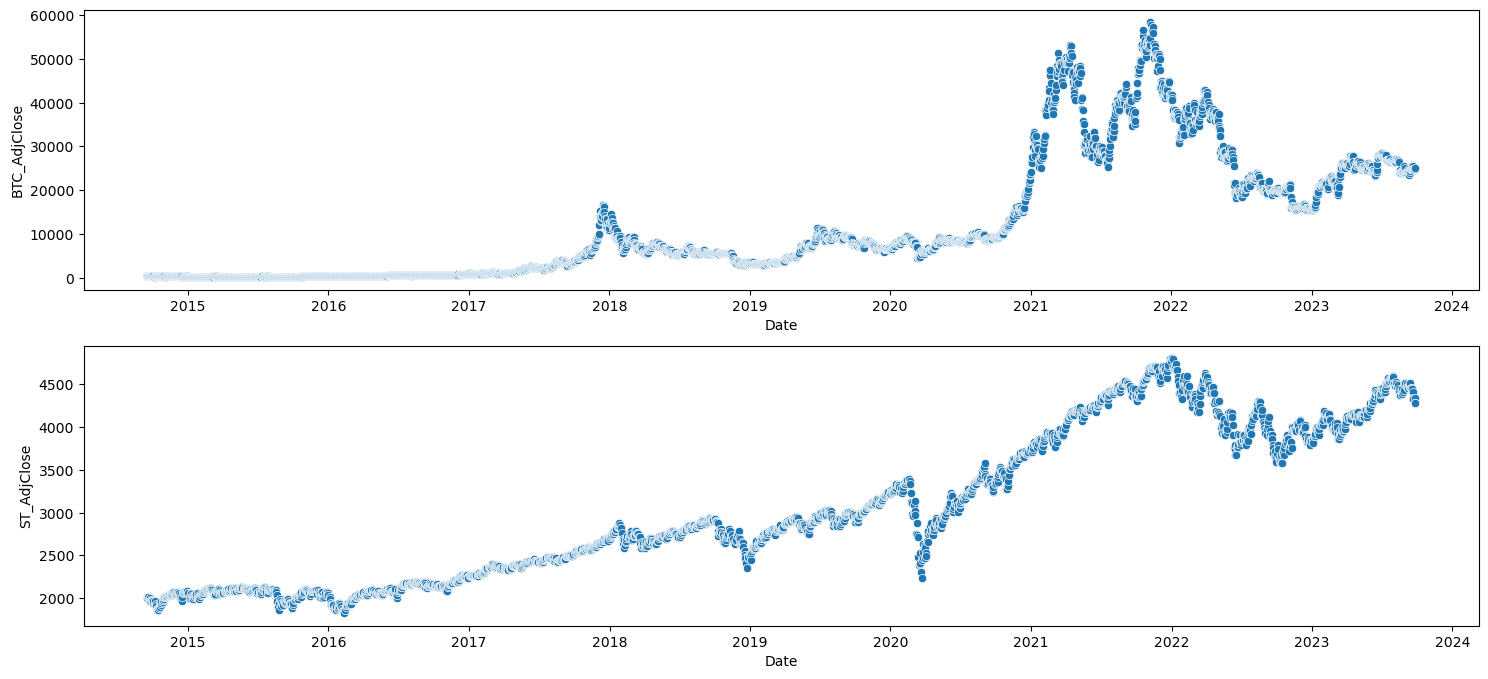

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(18,8))
sns.scatterplot(ax=axes[0], data=df, x=x, y=y_BTC)
sns.scatterplot(ax=axes[1], data=df, x=x, y=y_St)
plt.show()

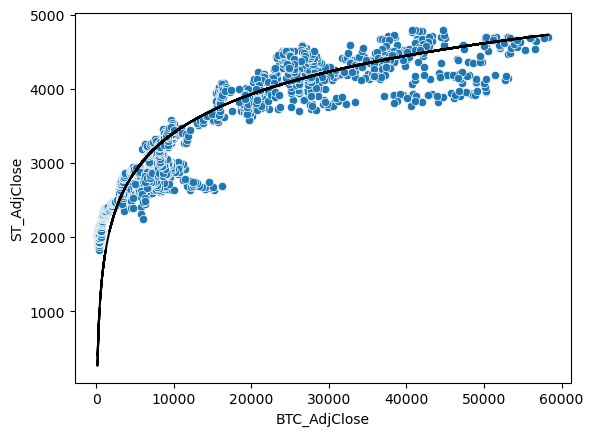

In [21]:
sns.scatterplot(data=df, x=df["BTC_AdjClose"], y=df["ST_AdjClose"])
plt.plot(df["BTC_AdjClose"],(np.log(df["BTC_AdjClose"]**(1/2))*1500)-3500, c="black")

plt.show()


In [22]:
for i in list(df.index)[1:]:
    df.loc[i,"BTC_Return"]=100*math.log2((df.loc[i,"BTC_AdjClose"])/(df.loc[i-1,"BTC_AdjClose"]))
# df

In [23]:
round(df.loc[:,"BTC_Return"].min())

-66

In [24]:
round(df.loc[:,"BTC_Return"].max())

33

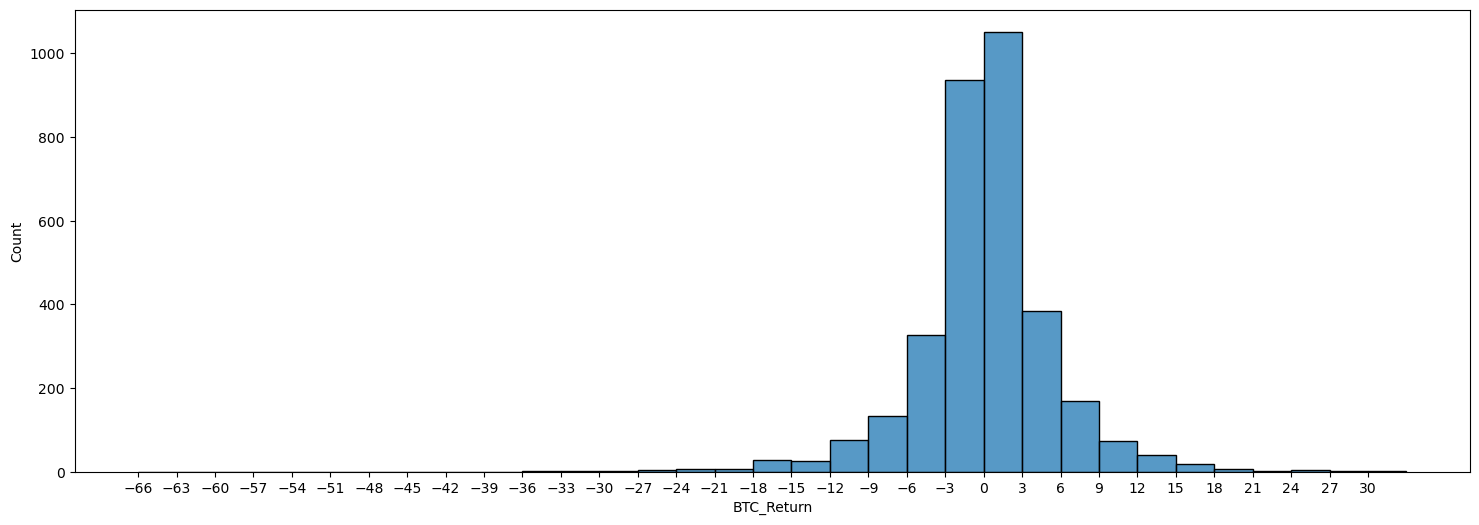

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(18,6))
sns.histplot(data=df,x=df["BTC_Return"], bins=33,binrange=[-66,33])
plt.xticks(list(range(-66,33,3)))
plt.show()

## Synthetic data generation 2

This code extends the analysis and data transformation on the DataFrame "df".

**Calculating BTC Amplitude**: a new column called "BTC_Amplitude" is created, representing the daily price amplitude of Bitcoin (BTC) as a percentage.

**Calculating 7-Day BTC Returns**: For each row starting from the 8th row (index 7 and onwards), the code calculates the 7-day logarithmic returns of BTC and stores them in a new column called "BTC_7Return."

**Calculating 7-Day BTC Rolling Average**: For each row starting from the 8th row, the code calculates the 7-day rolling average of BTC closing prices and stores it in the "BTC_7prevAVG" column.

**Calculating 14-Day BTC Rolling Average**: Similarly, for each row starting from the 15th row, the code calculates the 14-day rolling average of BTC closing prices and stores it in the "BTC_14prevAVG" column.

**Comparing Rolling Averages**: For each row starting from the 15th row, the code checks if the 14-day rolling average ("BTC_14prevAVG") is less than the 7-day rolling average ("BTC_7prevAVG"). If true, it assigns the value 1 to the "SMA_CROSS" column; otherwise, it assigns 0.

**Preparing for Future Data**: A new column called "BTC_NextDPrice" is created with NaN values, likely reserved for future data or calculations.

**Creating a Subset DataFrame**: A subset of the DataFrame "df" is created, containing selected columns. Columns related to "ST" are dropped, leaving only the relevant columns for further analysis.

**Additional Column**: A new column "BTC/St&P500" is calculated, which is a transformation of BTC closing prices.

In [26]:
df["BTC_Amplitude"]=100*((df.loc[:,"BTC_High"]/df.loc[:,"BTC_Low"])-1)
for i in list(df.index)[7:]:
    df.loc[i,"BTC_7Return"]=100*math.log2((df.loc[i,"BTC_AdjClose"])/(df.loc[i-7,"BTC_AdjClose"]))
    
for ii in list(df.index)[7:]:
    df.loc[ii,"BTC_7prevAVG"]=df.loc[ii-6:ii,"BTC_AdjClose"].mean()
    
for iii in list(df.index)[14:]:
    df.loc[iii,"BTC_14prevAVG"]=df.loc[iii-13:iii,"BTC_AdjClose"].mean()
    
for iv in list(df.index)[14:]:
    if (df.loc[iv,"BTC_14prevAVG"])<(df.loc[iv,"BTC_7prevAVG"]):
        df.loc[iv,"SMA_CROSS"]=1
    else:
        df.loc[iv,"SMA_CROSS"]=0


In [27]:
df["BTC_NextDPrice"]=np.nan

In [28]:
df.set_index("Date",inplace=True)
df.columns

Index(['BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Close', 'BTC_AdjClose',
       'BTC_Volume', 'ST_Open', 'ST_High', 'ST_Low', 'ST_Close', 'ST_AdjClose',
       'ST_Volume', 'USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)',
       'EURO (AM)', 'EURO (PM)', 'EU/US_Open', 'EU/US_High', 'EU/US_Low',
       'EU/US_Close', 'EU/US_AdjClose', 'EU/US_Volume', 'BTC_Return',
       'BTC_Amplitude', 'BTC_7Return', 'BTC_7prevAVG', 'BTC_14prevAVG',
       'SMA_CROSS', 'BTC_NextDPrice'],
      dtype='object')

In [29]:
final=df[df.columns[[0,1,2,3,4,5,-7,-6,-5,-4,-3,-2,-1]]].copy()
final

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,BTC_Return,BTC_Amplitude,BTC_7Return,BTC_7prevAVG,BTC_14prevAVG,SMA_CROSS,BTC_NextDPrice
Date,,,,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,NaN,2.810578,NaN,NaN,NaN,NaN,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,-11.563821,11.168580,NaN,NaN,NaN,NaN,NaN
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,-9.425518,10.710416,NaN,NaN,NaN,NaN,NaN
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,5.065488,8.570009,NaN,NaN,NaN,NaN,NaN
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,-3.725742,4.894686,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-24,24924.041016,24976.207031,24869.617188,24924.822266,24924.822266,6943757707,-0.000972,0.428595,0.151567,25088.046875,24741.751814,1.0,NaN
2023-09-25,24924.808594,25032.384766,24622.509766,24657.968750,24657.968750,7693979394,-1.552926,1.664635,-1.250130,25057.390346,24781.250977,1.0,NaN
2023-09-26,24655.103516,24945.947266,24474.373047,24829.972656,24829.972656,11327874247,1.002871,1.926808,-1.108786,25030.023717,24882.503209,1.0,NaN


In [30]:
final["BTC/St&P500"]=(1500*np.log((final["BTC_AdjClose"])**(1/2)))-3000

# BTC average price forecast

This code is using the scikit-learn library to perform various machine learning tasks, such as regression modeling and data preprocessing.

**Data Preparation**: the code checks for missing values in a specific column of the DataFrame "final." Rows with missing values in the column specified by *final.columns[-4]* (the fourth column from the end) are identified and stored in the "todrop" variable.

**Removing Rows with Missing Values**: Rows identified as having missing values are then removed from the DataFrame "final" using the final.drop(todrop, axis=0, inplace=True) statement. 

In [31]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [32]:
final.columns[-4]

'BTC_14prevAVG'

In [33]:
# print(final.columns)
todrop = final.loc[final[final.columns[-4]].isna()==True,].index
len(todrop)

14

In [34]:
final.drop(todrop,axis=0,inplace=True)

In [35]:
final.isna().sum()

BTC_Open             0
BTC_High             0
BTC_Low              0
BTC_Close            0
BTC_AdjClose         0
BTC_Volume           0
BTC_Return           0
BTC_Amplitude        0
BTC_7Return          0
BTC_7prevAVG         0
BTC_14prevAVG        0
SMA_CROSS            0
BTC_NextDPrice    3285
BTC/St&P500          0
dtype: int64

The next function is designed to implement a machine learning model using a **Stochastic Gradient Descent (SGD) Regressor**. 

The code iterates through the data in segments, where each segment consists of 500 rows, with 500 rows of feature variables (X) followed by 500 rows of target variables (Y). 

The data is scaled using **Min-Max scaling** to normalize it within a specific range, and then it's split into training and testing sets. 

The model, configured with a **squared error loss function**, is trained on the training data and evaluated on both the training and testing data. 

Evaluation metrics such as **Root Mean Squared Error (RMSE), Absolute Error,** and **Percentual Absolute Error (MAPE)** are calculated to assess the model's performance. 

Additionally, **scatterplots** are generated after each iteration to visualize the relationship between actual and predicted values. 

This process is likely repeated for various segments of data, allowing the model to make predictions for Bitcoin prices, which are then recorded in the "BTC_NextDPrice" column of the DataFrame "df."

Model metrics on training: 
 RMSE: 21.242329758907236
 Absolute error: 15.762882617933114

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 22.616509301268888
 Absolute error: 19.97742995262999
 Percentual absolute error: 0.05679733845111789
____________________________________________________________________________




C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


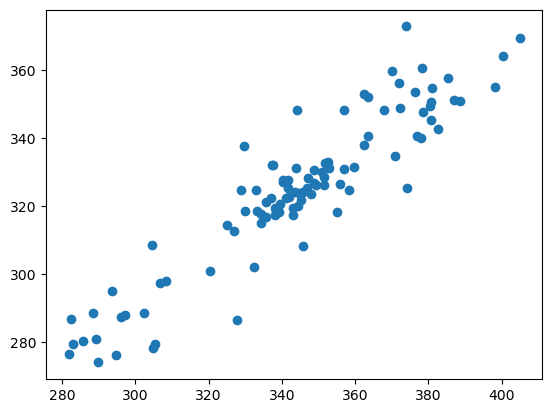

Model metrics on training: 
 RMSE: 40.547007842053546
 Absolute error: 37.603612332617615

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 125.89596462568572
 Absolute error: 116.73672832900078
 Percentual absolute error: 0.23571792279815212
____________________________________________________________________________




C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


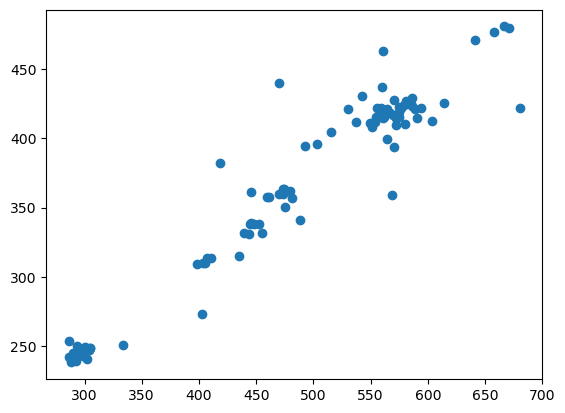

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 32.106614496218036
 Absolute error: 25.032880438053404

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 48.956861482121205
 Absolute error: 44.95909843211504
 Percentual absolute error: 0.0829034029520544
____________________________________________________________________________




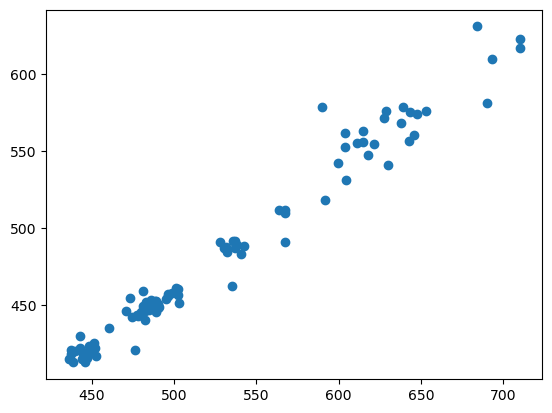

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 69.32137952937313
 Absolute error: 62.39761635805733

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 251.7449896031545
 Absolute error: 238.89727863665755
 Percentual absolute error: 0.2936557875290391
____________________________________________________________________________




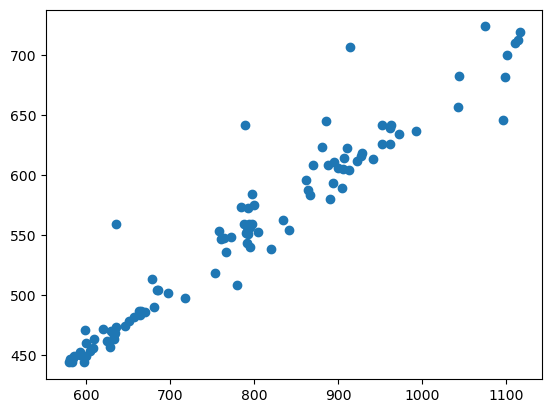

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 158.67742773444442
 Absolute error: 126.98147272396037

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 741.3398891605693
 Absolute error: 650.6938218159326
 Percentual absolute error: 0.5124834012649933
____________________________________________________________________________




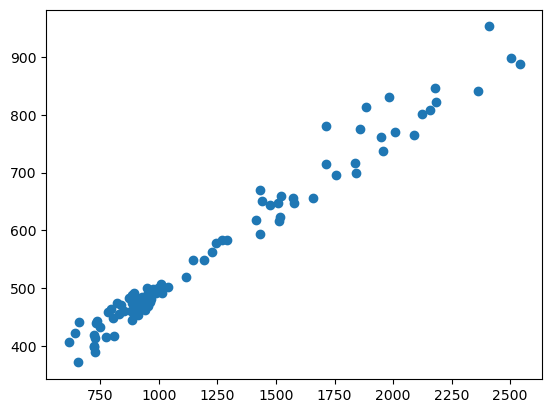

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 274.3671098388138
 Absolute error: 209.38390984061363

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 1366.6871606829914
 Absolute error: 1288.7925635418019
 Percentual absolute error: 0.47964477628039065
____________________________________________________________________________




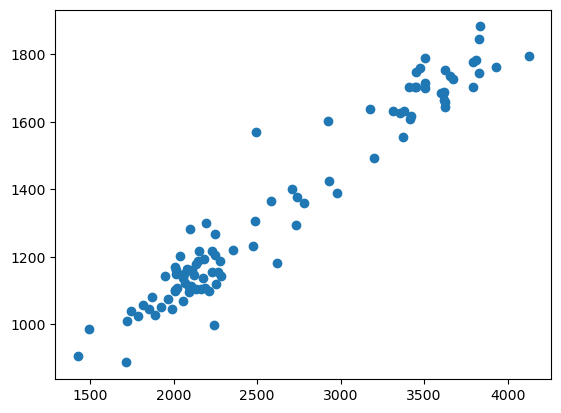

Model metrics on training: 
 RMSE: 826.78361725752
 Absolute error: 687.7187462671028

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 6190.418967518522
 Absolute error: 5152.696361376064
 Percentual absolute error: 0.7155805663864457
____________________________________________________________________________




C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


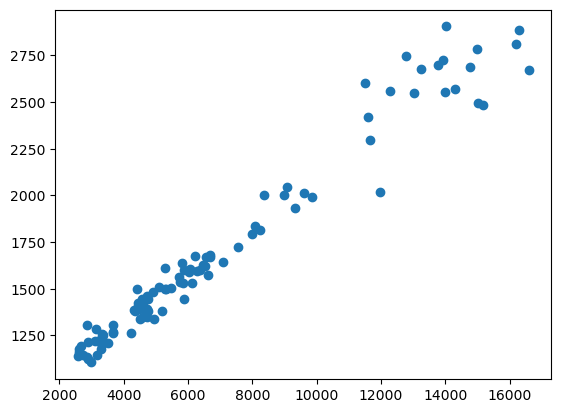

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 730.969190494091
 Absolute error: 508.6646386110304

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 960.574998919021
 Absolute error: 745.8035385013491
 Percentual absolute error: 0.0836417223693353
____________________________________________________________________________




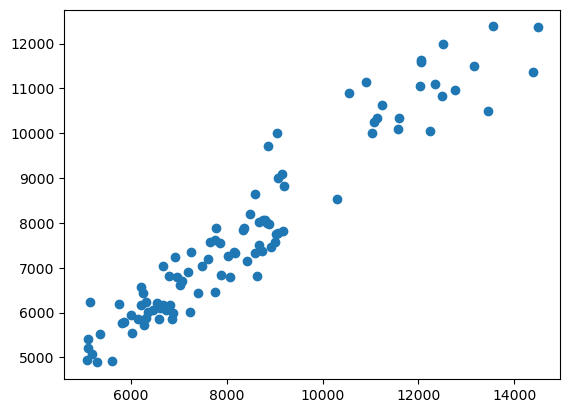

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 721.9021045837882
 Absolute error: 541.3663158870926

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 278.2663664685468
 Absolute error: 209.48635736684034
 Percentual absolute error: 0.03513342525552686
____________________________________________________________________________




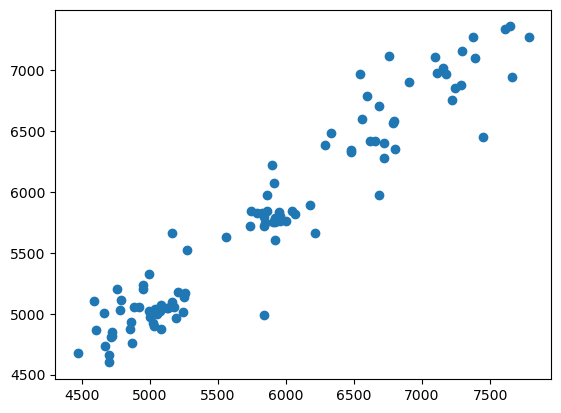

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 820.3816703408219
 Absolute error: 594.6967891926741

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 268.00870224314355
 Absolute error: 216.22692180524925
 Percentual absolute error: 0.047772044609321815
____________________________________________________________________________




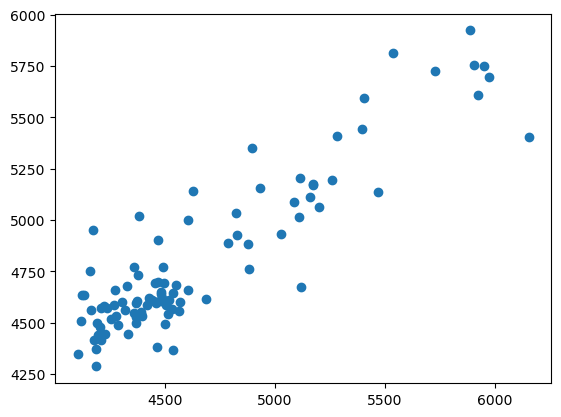

Model metrics on training: 
 RMSE: 997.9285250355573
 Absolute error: 734.2034111358362

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 1496.756041425922
 Absolute error: 1413.1451922167355
 Percentual absolute error: 8.080391513138442e+16
____________________________________________________________________________




C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


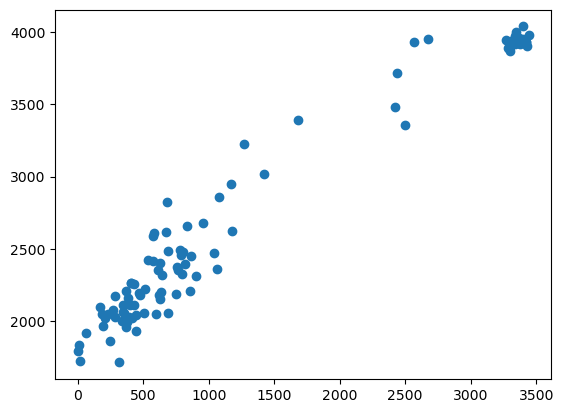

Model metrics on training: 
 RMSE: 782.2556072533572
 Absolute error: 562.3860910463688

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 1072.7258141074337
 Absolute error: 1054.205163927564
 Percentual absolute error: 1.556702052755426
____________________________________________________________________________




C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


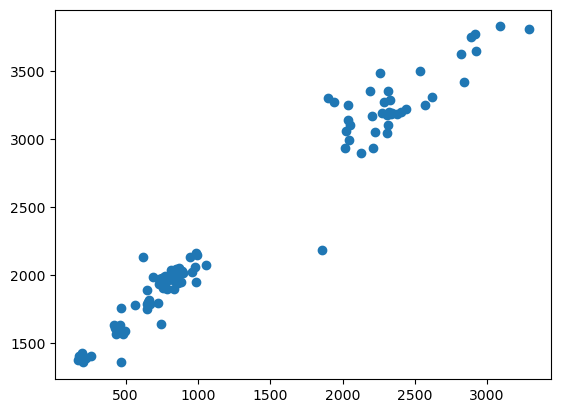

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 680.7138630413011
 Absolute error: 559.4604944331826

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 1849.704529094818
 Absolute error: 1669.787639971682
 Percentual absolute error: 0.2053157119694762
____________________________________________________________________________




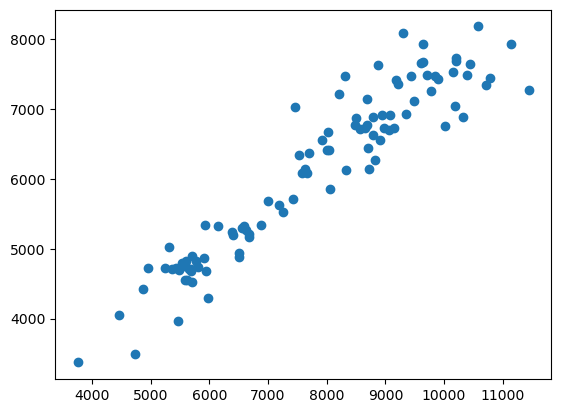

Model metrics on training: 
 RMSE: 503.72976706305866
 Absolute error: 385.2268125546673

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 448.8686673572419
 Absolute error: 348.45656946905564
 Percentual absolute error: 0.048592179692088164
____________________________________________________________________________




C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


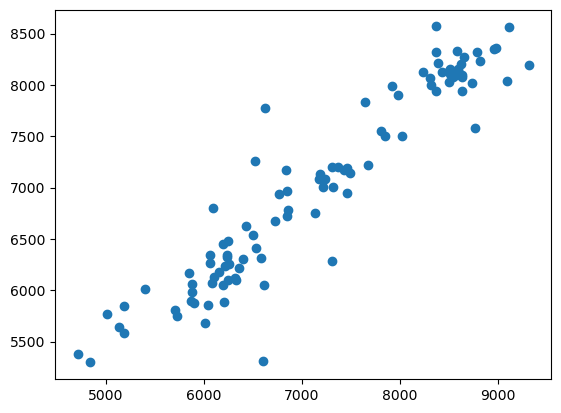

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 479.7446865990697
 Absolute error: 367.29313649648697

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 331.5696629460637
 Absolute error: 264.0169549582375
 Percentual absolute error: 0.042563570195397055
____________________________________________________________________________




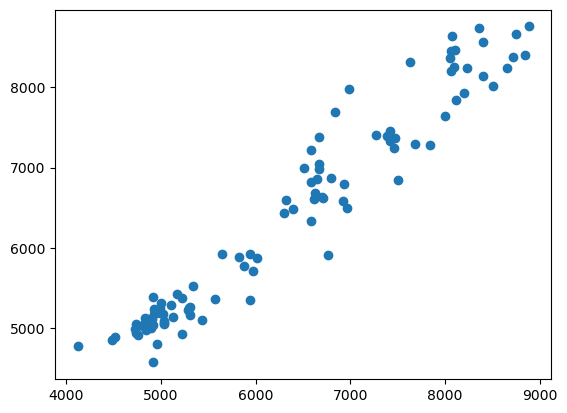

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 577.220970733904
 Absolute error: 460.76508982564815

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 663.5975059630218
 Absolute error: 429.82554443397026
 Percentual absolute error: 0.11202253691918314
____________________________________________________________________________




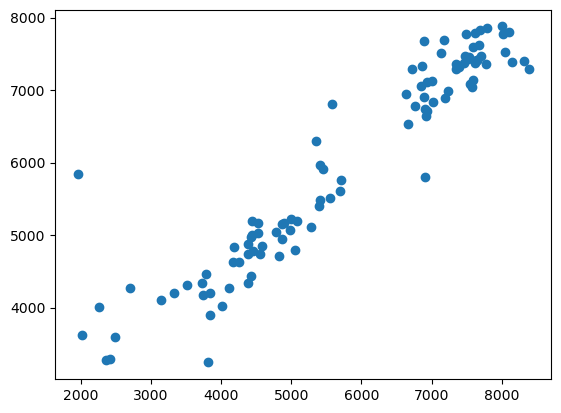

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 769.8386470422281
 Absolute error: 580.1466153854341

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 549.0558708688632
 Absolute error: 404.58433403541653
 Percentual absolute error: 0.050113910180741905
____________________________________________________________________________




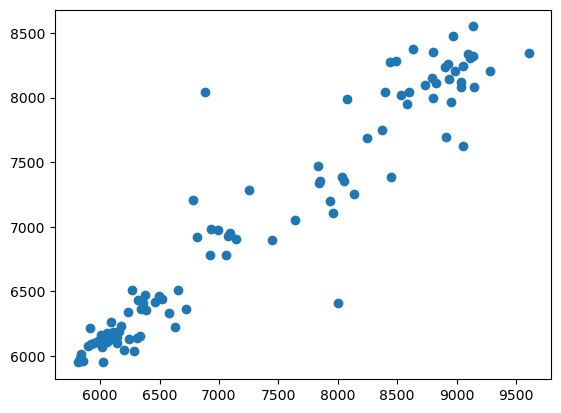

Model metrics on training: 
 RMSE: 1106.3345058912687
 Absolute error: 884.7486218166935

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 6021.483053568058
 Absolute error: 4964.792870548428
 Percentual absolute error: 0.3894328550915593
____________________________________________________________________________




C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


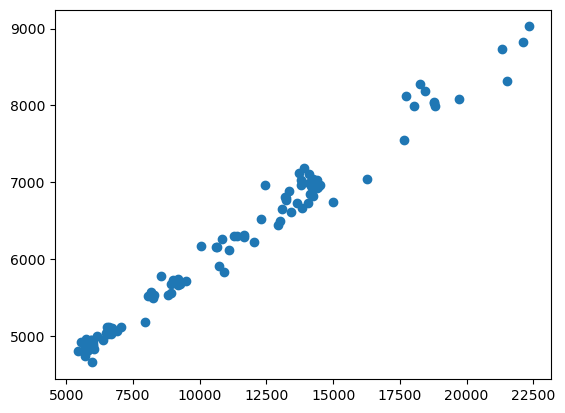

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 2896.9888524153184
 Absolute error: 1985.2261233340341

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 28027.1493786909
 Absolute error: 26839.676187446297
 Percentual absolute error: 0.7139562091516892
____________________________________________________________________________




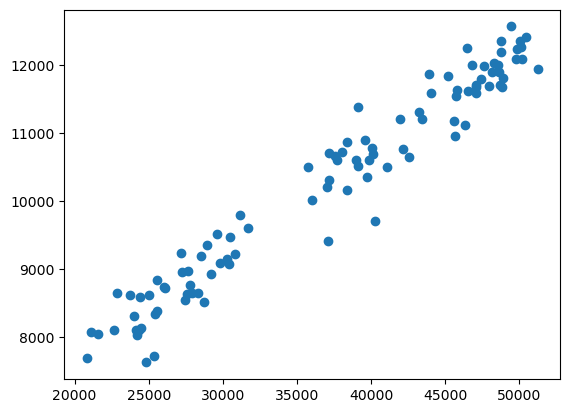

Model metrics on training: 
 RMSE: 1437.1509926528854
 Absolute error: 1111.051930372669

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 2032.8897947569735
 Absolute error: 1575.2257793041174
 Percentual absolute error: 0.046253718954848685
____________________________________________________________________________




C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


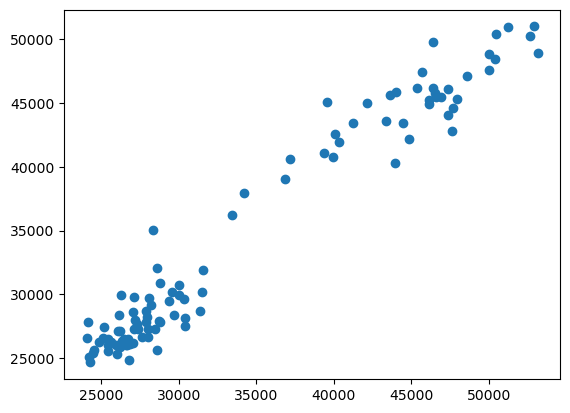

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 1938.7171714045217
 Absolute error: 1609.484334562718

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 2384.7577279578877
 Absolute error: 1932.01351163683
 Percentual absolute error: 0.0504604955818956
____________________________________________________________________________




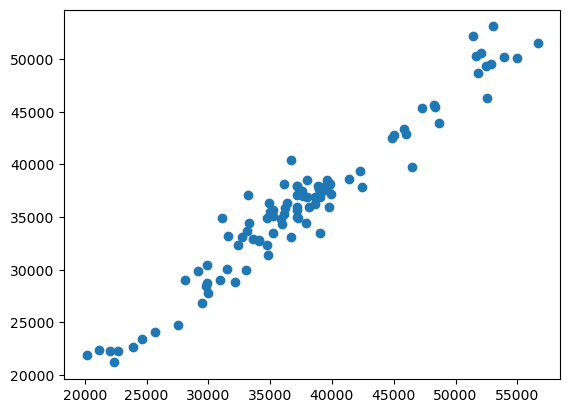

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 2773.9357996007902
 Absolute error: 2354.8035673878103

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 2141.113022282043
 Absolute error: 1656.703215773594
 Percentual absolute error: 0.0384317837933076
____________________________________________________________________________




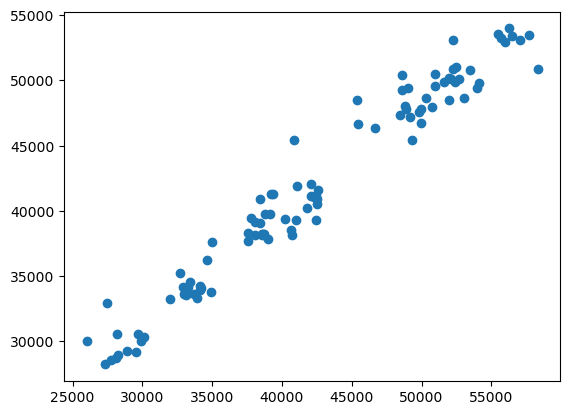

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 4080.1262376156233
 Absolute error: 3395.7256361015952

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 3183.5640961191275
 Absolute error: 2496.753320619462
 Percentual absolute error: 0.1472810177237238
____________________________________________________________________________




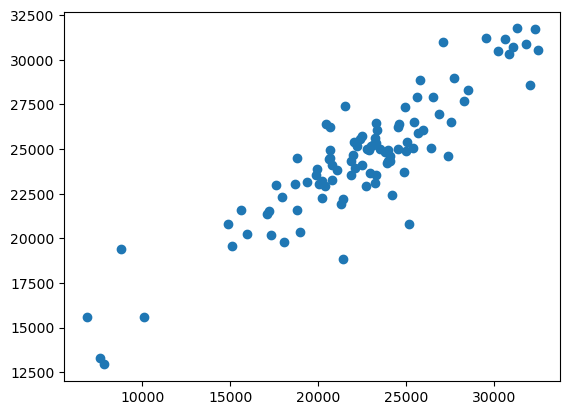

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 3470.1353675861496
 Absolute error: 2793.1781734258407

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 6699.923312555684
 Absolute error: 6492.675130857147
 Percentual absolute error: 4.291129495086864e+17
____________________________________________________________________________




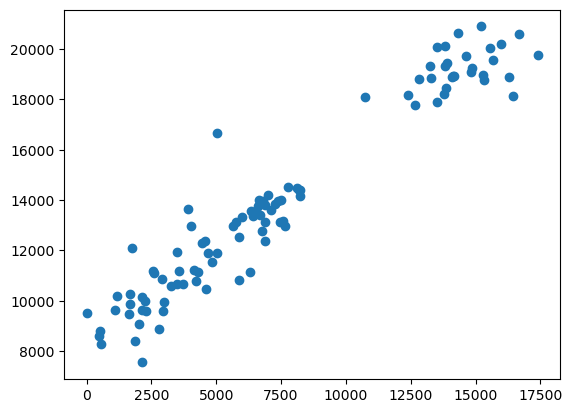

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 3139.2716552508377
 Absolute error: 2534.5070792127863

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 5142.917647493239
 Absolute error: 5070.668687020019
 Percentual absolute error: 2.9081617330223917e+17
____________________________________________________________________________




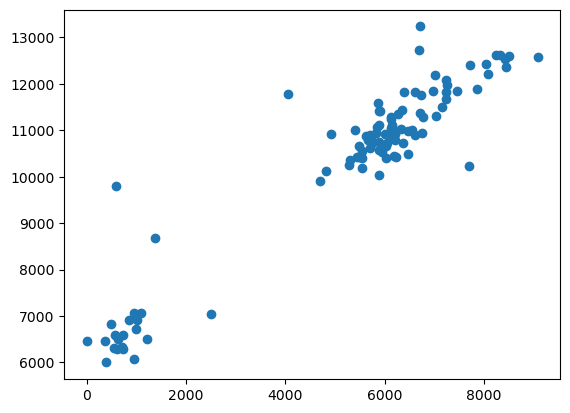

Model metrics on training: 
 RMSE: 2324.4657354548613
 Absolute error: 1919.686331728073

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 2226.0067090297443
 Absolute error: 2112.2526205760764
 Percentual absolute error: 3.5941762384035525
____________________________________________________________________________




C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


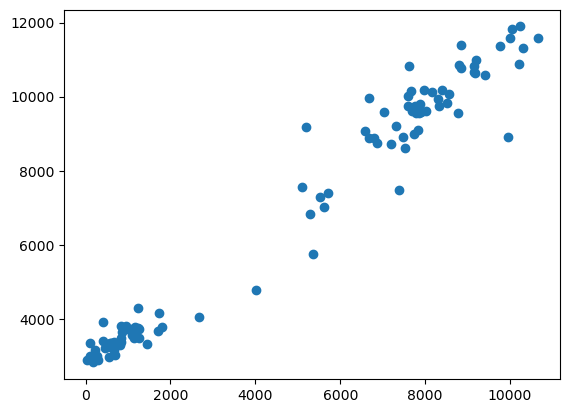

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model metrics on training: 
 RMSE: 1798.498078339213
 Absolute error: 1323.6000034021415

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 1027.7856156357998
 Absolute error: 768.0576562977917
 Percentual absolute error: 0.05683857453687566
____________________________________________________________________________




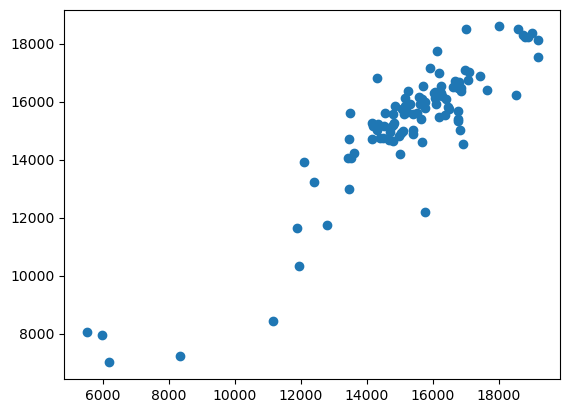

Model metrics on training: 
 RMSE: 1800.7954441131676
 Absolute error: 1369.4691873144639

-----------------------------------------------------------
Model metrics on tests: 
 RMSE: 1602.8809864343914
 Absolute error: 1328.4777634970576
 Percentual absolute error: 0.059251393029256444
____________________________________________________________________________




C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


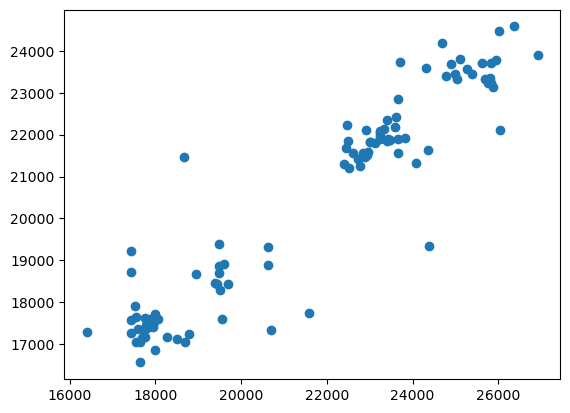

,BTC_AdjClose,BTC_NextDPrice
Date,,
2016-01-26,361.098541,314.419754
2016-01-27,362.326385,312.793026
2016-01-28,347.804108,308.697475
2016-01-29,350.359161,298.066955
2016-01-30,349.233673,297.433320
...,...,...
2023-09-21,25475.597656,19315.025829
2023-09-22,24921.820312,19398.902189
2023-09-23,24924.990234,18865.165614


In [36]:
for i in range(581,len(final)+1,100):
    X = final.iloc[i-500:i,[0,1,2,3,4,5,6,7,8,9,10]]
    Y = final.iloc[i-499:i+1:,[4]]
    Scaler = MinMaxScaler()
    maxFactor = Y.max().values[0] 
    XScaled = Scaler.fit_transform(X.to_numpy())
    YScaled = Scaler.fit_transform(Y.to_numpy())
    #     print("Scaled Dataset Using StandardScaler")
    XScaled =pd.DataFrame(XScaled, columns=[X.columns])
    YScaled =pd.DataFrame(YScaled, columns=[Y.columns])
    #     print(f" {maxFactor}")

    X_train = XScaled.iloc[:400]
    X_test = XScaled.iloc[400:]
    Y_train = YScaled.iloc[:400]
    Y_test = YScaled.iloc[400:]
    lista = Y[-100:].index.values
    
    BTCprice = SGDRegressor(loss='squared_error')
    BTCprice.fit(X_train, Y_train)
    
    Y_train_predicted = BTCprice.predict(X_train)
    mse = mean_squared_error(Y_train*maxFactor,Y_train_predicted*maxFactor)
    mae = mean_absolute_error (Y_train*maxFactor,Y_train_predicted*maxFactor)
    #     mape = mean_absolute_percentage_error (Y_train*maxFactor,Y_train_predicted*maxFactor)
    print("Model metrics on training: \n",f"RMSE: {np.sqrt(mse)}\n",f"Absolute error: {mae}\n")
    print("-----------------------------------------------------------")

    Y_test_predicted = BTCprice.predict(X_test)
    df.loc[lista,"BTC_NextDPrice"]=Y_test_predicted*maxFactor
    mse = mean_squared_error(Y_test*maxFactor,Y_test_predicted*maxFactor)
    mae = mean_absolute_error (Y_test*maxFactor,Y_test_predicted*maxFactor)
    mape = mean_absolute_percentage_error (Y_test*maxFactor,Y_test_predicted*maxFactor)
    print("Model metrics on tests: \n",f"RMSE: {np.sqrt(mse)}\n",f"Absolute error: {mae}\n",f"Percentual absolute error: {mape}")
    print("____________________________________________________________________________")
    print("\n")
    plt.scatter(x=(Y_test*maxFactor), y=(Y_test_predicted*maxFactor))
    plt.show()
df.loc[df["BTC_NextDPrice"].isna()==False,["BTC_AdjClose","BTC_NextDPrice"]]

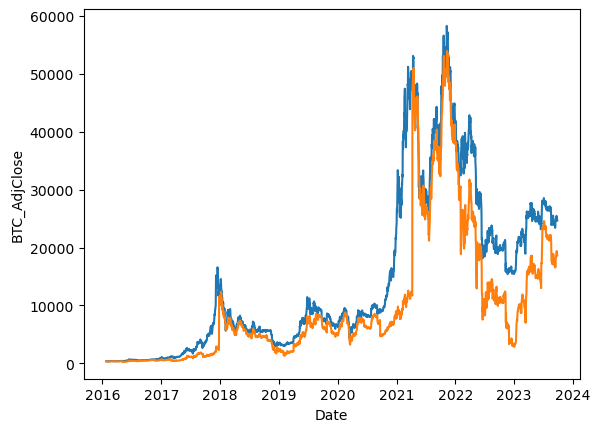

In [37]:
sns.lineplot(x=df[df["BTC_NextDPrice"].isna()==False].index,
             y=df.loc[df["BTC_NextDPrice"].isna()==False,"BTC_AdjClose"])
sns.lineplot(x=df[df["BTC_NextDPrice"].isna()==False].index,
             y=df.loc[df["BTC_NextDPrice"].isna()==False,"BTC_NextDPrice"])
plt.show()

In [38]:
variable = df.describe().loc[["min","max"]]
variable

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ST_Open,ST_High,ST_Low,ST_Close,...,EU/US_Close,EU/US_AdjClose,EU/US_Volume,BTC_Return,BTC_Amplitude,BTC_7Return,BTC_7prevAVG,BTC_14prevAVG,SMA_CROSS,BTC_NextDPrice
min,150.128998,183.047470,145.483078,151.152512,151.152512,4.640334e+06,1833.400024,1847.000000,1810.099976,1829.079956,...,0.959619,0.959619,0.0,-66.052697,-0.704590,-86.416571,176.291153,193.292681,0.0,238.333994
max,58290.289062,59496.148438,57269.132812,58305.039062,58305.039062,2.907271e+11,4804.509766,4818.620117,4780.040039,4796.560059,...,1.295908,1.295908,0.0,32.869436,61.975069,82.198127,57001.453125,55560.351004,1.0,53974.680306


In [39]:
datahoy=df.index[-1]

In [40]:
Dfhoy=pd.DataFrame(columns=variable.columns)
for item in variable.columns:
    diference =(df.loc[datahoy,item]-df[item].min())/(df[item].max()-df[item].min())
    Dfhoy.loc[0,item]=diference
    

C:\Users\ronoa\AppData\Local\Temp\ipykernel_19432\3096434184.py:3: RuntimeWarning: invalid value encountered in scalar divide
  diference =(df.loc[datahoy,item]-df[item].min())/(df[item].max()-df[item].min())


Here we create a new DataFrame named "Dfhoy". The code initializes it with columns that match the columns of another DataFrame called "variable." It then proceeds to calculate and populate the values in the "Dfhoy" DataFrame based on some calculations involving the "df" DataFrame. 

**Creating an Empty DataFrame**: The code begins by creating a new DataFrame called "Dfhoy" with columns that match the columns of another DataFrame named "variable." 

**Iterating Over Columns**: The code then enters a loop that iterates through the columns of the "variable" DataFrame one by one.

**Calculating Differences and Normalization**: Within the loop, the code calculates a "difference" for each column, which appears to be the difference between a corresponding value in the "df" DataFrame and the minimum value in the same column of "df." This difference is then divided by the range (max - min) of values in the same column of "df." This calculation essentially normalizes the values in the column.

**Populating "Dfhoy"**: After calculating the difference and normalization for a column, the code assigns the result to the "Dfhoy" DataFrame at row 0 and under the corresponding column name. This process is repeated for each column in the "variable" DataFrame.

In [41]:
Dfhoy

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ST_Open,ST_High,ST_Low,ST_Close,...,EU/US_Close,EU/US_AdjClose,EU/US_Volume,BTC_Return,BTC_Amplitude,BTC_7Return,BTC_7prevAVG,BTC_14prevAVG,SMA_CROSS,BTC_NextDPrice
0,0.429078,0.422172,0.435986,0.42841,0.42841,0.041165,NaN,NaN,NaN,NaN,...,0.281205,0.281205,NaN,0.682896,0.022245,0.498601,0.434656,0.447737,0.0,NaN


In [42]:
BTCprice.predict(Dfhoy[["BTC_Open","BTC_High","BTC_Low","BTC_Close","BTC_AdjClose","BTC_Volume","BTC_Return","BTC_Amplitude","BTC_7prevAVG","BTC_14prevAVG","SMA_CROSS"]])*df["BTC_AdjClose"].max()

C:\Users\ronoa\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


array([23083.15349688])

The code use a previously trained machine learning model to make predictions on "Dfhoy."

**Prediction**: The BTCprice.predict() method is used to make predictions on the "Dfhoy" DataFrame. It's passing a subset of columns from "Dfhoy" as input features for the prediction. These columns include "BTC_Open," "BTC_High," "BTC_Low," "BTC_Close," "BTC_AdjClose," "BTC_Volume," "BTC_Return," "BTC_Amplitude," "BTC_7prevAVG," "BTC_14prevAVG," and "SMA_CROSS."

**Scaling Factor**: After making predictions, the result is scaled by multiplying it by the maximum value of the "BTC_AdjClose" column from the original "df" DataFrame. This step scales the predicted values back to the original scale of Bitcoin prices.

# Bitcoin Price Prediction with Recurrent Neural Networks (RNN)

In this project, we will utilize preprocessed data from the "final" DataFrame to predict the price of Bitcoin (BTC) for the following day using Recurrent Neural Networks (RNNs). We will explore two different data scalers, Standard Scaler and Min-Max Scaler, to preprocess the data and compare their impact on model performance.

## Dataset

We will be working with the "final" DataFrame, which contains the following columns:

- `BTC_Open`
- `BTC_High`
- `BTC_Low`
- `BTC_Close`
- `BTC_AdjClose`
- `BTC_Volume`
- `BTC_Return`
- `BTC_Amplitude`
- `BTC_7Return`
- `BTC_7prevAVG`
- `BTC_14prevAVG`
- `SMA_CROSS`
- `BTC_NextDPrice`
- `BTC/St&P500`

This dataset is already preprocessed and ready for further analysis and modeling.

## RNN Models

We will develop two distinct RNN models for predicting Bitcoin prices, each using a different data scaler:

1. **RNN with Standard Scaler (Model A)**: This model will use Standard Scaler for data preprocessing. We will assess its impact on model performance.

2. **RNN with Min-Max Scaler (Model B)**: In contrast, Model B will employ Min-Max Scaler for data preprocessing. This enables us to compare the performance of the two scalers and select the one that yields better results.

## Workflow

Our workflow for building and evaluating these RNN models will include the following steps:

1. **Data Preparation**: We will split the dataset into training and testing sets, ensuring that our models have sufficient data for training and evaluation.

2. **Model Architecture**: Define the architecture of each RNN model, including the number of layers, units, and activation functions.

3. **Data Scaling**: Apply the respective scalers (Standard Scaler for Model A and Min-Max Scaler for Model B) to preprocess the input data for each model.

4. **Model Training**: Train both Model A and Model B using the training data and evaluate their performance on the testing data.

5. **Model Comparison**: Compare the prediction results of the two models and select the one that provides more accurate predictions.

6. **Future Predictions**: Once the best model is identified, use it to predict Bitcoin prices for future dates.

By following this approach, we aim to develop a reliable model for Bitcoin price prediction and gain insights into how different data scalers, Standard Scaler and Min-Max Scaler, affect the model's performance.


In [43]:
final

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,BTC_Return,BTC_Amplitude,BTC_7Return,BTC_7prevAVG,BTC_14prevAVG,SMA_CROSS,BTC_NextDPrice,BTC/St&P500
Date,,,,,,,,,,,,,,
2014-10-01,306.799957,310.224304,301.894867,303.949768,303.949768,20782347,-1.166568,2.759052,-12.408754,308.635454,314.967045,0.0,NaN,1287.646838
2014-10-02,304.245300,304.692535,294.376831,296.054932,296.054932,17189755,-3.796803,3.504251,-12.422410,304.832358,312.646729,0.0,NaN,1267.908763
2014-10-03,296.140961,299.354065,285.944061,287.264862,287.264862,24691330,-4.348335,4.689730,-15.070831,300.313503,311.182709,0.0,NaN,1245.303491
2014-10-04,287.568512,291.240112,260.396301,262.777466,262.777466,37743907,-12.853997,11.844950,-26.164388,292.848973,307.184030,0.0,NaN,1178.480652
2014-10-05,262.817413,273.113068,231.159409,256.162079,256.162079,66582558,-3.678464,18.149233,-21.621437,286.932312,303.293289,0.0,NaN,1159.357774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-24,24924.041016,24976.207031,24869.617188,24924.822266,24924.822266,6943757707,-0.000972,0.428595,0.151567,25088.046875,24741.751814,1.0,NaN,4592.714598
2023-09-25,24924.808594,25032.384766,24622.509766,24657.968750,24657.968750,7693979394,-1.552926,1.664635,-1.250130,25057.390346,24781.250977,1.0,NaN,4584.641552
2023-09-26,24655.103516,24945.947266,24474.373047,24829.972656,24829.972656,11327874247,1.002871,1.926808,-1.108786,25030.023717,24882.503209,1.0,NaN,4589.855083


### Model A 
With MinMaxScaler

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

def train_and_evaluate_gruA(dataframe):
    """
    Train and evaluate a GRU-based model for Bitcoin price prediction.

    Parameters:
    - dataframe: DataFrame containing Bitcoin price and related features.

    Returns:
    - None
    """

    # Loop over the data with a sliding window approach
    # Start the loop from (len(final) - 2701) and iterate to the end with steps of 100.
    for i in range((len(dataframe) - 2701), len(dataframe), 100):
        # Extract input and target data
        X = dataframe.iloc[i - 500:i, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
        Y = dataframe.iloc[i - 499:i + 1:, [4]]

        # Scale the data using Min-Max scaling
        scaler = MinMaxScaler()
        maxFactor = Y.max().values[0]
        X_scaled = scaler.fit_transform(X.to_numpy())
        Y_scaled = scaler.fit_transform(Y.to_numpy())

        # Split the data into training and test sets
        X_train = X_scaled[:400]
        X_test = X_scaled[400:]
        Y_train = Y_scaled[:400]
        Y_test = Y_scaled[400:]

        # Create a sequential Keras model
        model = Sequential()

        # Add a GRU layer with 100 units, input shape, and specific GRU configurations
        model.add(GRU(100, input_shape=(X_train.shape[1], 1), reset_after=True, recurrent_activation='sigmoid', return_sequences=True))

        # Add another GRU layer with similar configurations
        model.add(GRU(100, reset_after=True, recurrent_activation='sigmoid'))

        # Add dropout with a rate of 20% to prevent overfitting
        model.add(Dropout(0.2))

        # Add a dense output layer
        model.add(Dense(1))

        # Compile the model with mean squared error loss and Adam optimizer
        model.compile(loss='mean_squared_error', optimizer='adam')
    
        # Train the model
        model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), Y_train, batch_size=64, epochs=20)

        # Make predictions on the test set
        Y_test_predicted = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

        # Calculate performance metrics
        mse = mean_squared_error(Y_test * maxFactor, Y_test_predicted * maxFactor)
        mae = mean_absolute_error(Y_test * maxFactor, Y_test_predicted * maxFactor)
        mape = mean_absolute_percentage_error(Y_test * maxFactor, Y_test_predicted * maxFactor)

        # Print the date for the current set
        current_date = dataframe.index[i + 1].strftime("%Y-%m-%d")
        print(f"Date for the current set: {current_date}")

        # Print model metrics
        print("Model metrics on the test set:")
        print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape}")
        print("____________________________________________________________________________")
        print("\n")

        # Plot the actual vs. predicted prices
        plt.figure(figsize=(10, 6))
        plt.scatter(x=(Y_test * maxFactor), y=(Y_test_predicted * maxFactor))
        plt.xlabel("Real Value")
        plt.ylabel("Predicted Value")
        plt.title("Scatterplot of Test Data")
        plt.show()
        
    # Print the value of the last predicted Bitcoin price
    last_predicted_price = Y_test_predicted[-1][0] * maxFactor
    print(f"The predicted Bitcoin price in euros for the next day is: {last_predicted_price}")



Epoch 1/20
7/7 [==============================] - 4s 33ms/step - loss: 0.0782
Epoch 2/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0261
Epoch 3/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0184
Epoch 4/20
7/7 [==============================] - 0s 40ms/step - loss: 0.0100
Epoch 5/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0068
Epoch 6/20
7/7 [==============================] - 0s 40ms/step - loss: 0.0048
Epoch 7/20
7/7 [==============================] - 0s 47ms/step - loss: 0.0039
Epoch 8/20
7/7 [==============================] - 0s 44ms/step - loss: 0.0032
Epoch 9/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0035
Epoch 10/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0035
Epoch 11/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0030
Epoch 12/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0032
Epoch 13/20
7/7 [==============================] - 0s 31ms/st

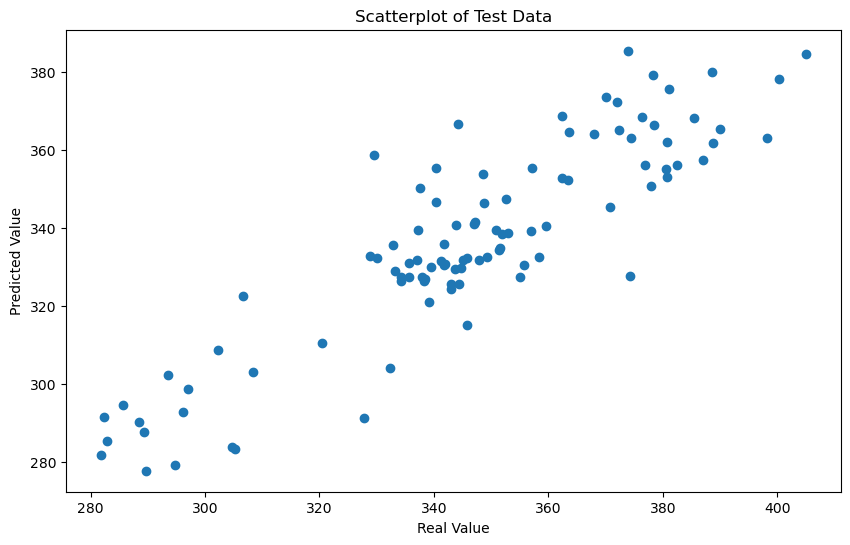

Epoch 1/20
7/7 [==============================] - 4s 36ms/step - loss: 0.0335
Epoch 2/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0129
Epoch 3/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0106
Epoch 4/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0065
Epoch 5/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0041
Epoch 6/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0022
Epoch 7/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0018
Epoch 8/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0015
Epoch 9/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0012
Epoch 10/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0011
Epoch 11/20
7/7 [==============================] - 0s 42ms/step - loss: 9.7178e-04
Epoch 12/20
7/7 [==============================] - 0s 33ms/step - loss: 9.5067e-04
Epoch 13/20
7/7 [==============================] - 0s

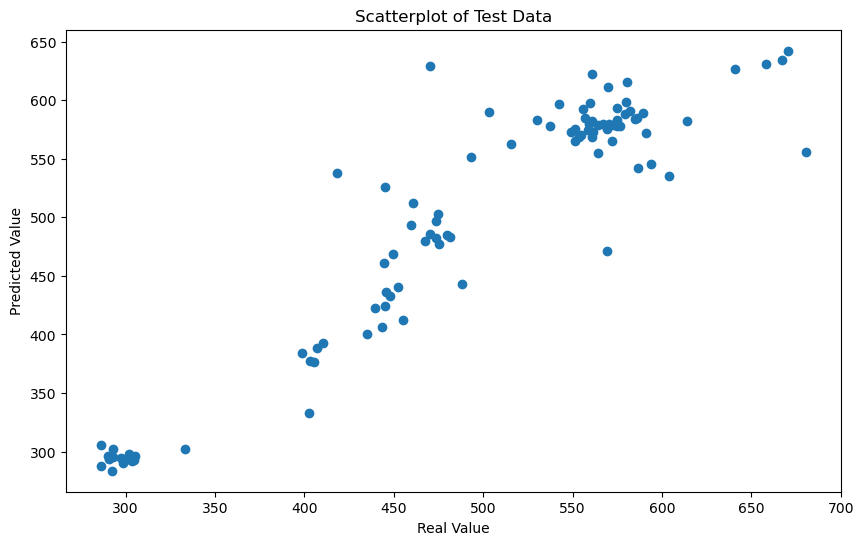

Epoch 1/20
7/7 [==============================] - 4s 31ms/step - loss: 0.0877
Epoch 2/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0316
Epoch 3/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0242
Epoch 4/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0125
Epoch 5/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0105
Epoch 6/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0065
Epoch 7/20
7/7 [==============================] - 0s 28ms/step - loss: 0.0039
Epoch 8/20
7/7 [==============================] - 0s 28ms/step - loss: 0.0029
Epoch 9/20
7/7 [==============================] - 0s 28ms/step - loss: 0.0030
Epoch 10/20
7/7 [==============================] - 0s 28ms/step - loss: 0.0032
Epoch 11/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0025
Epoch 12/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0028
Epoch 13/20
7/7 [==============================] - 0s 29ms/st

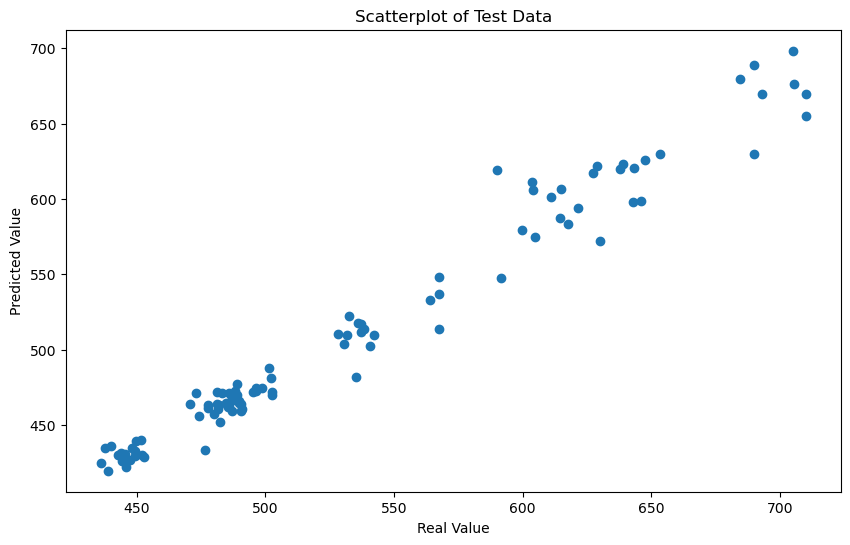

Epoch 1/20
7/7 [==============================] - 4s 29ms/step - loss: 0.0321
Epoch 2/20
7/7 [==============================] - 0s 28ms/step - loss: 0.0104
Epoch 3/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0090
Epoch 4/20
7/7 [==============================] - 0s 28ms/step - loss: 0.0066
Epoch 5/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0048
Epoch 6/20
7/7 [==============================] - 0s 28ms/step - loss: 0.0043
Epoch 7/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0035
Epoch 8/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0024
Epoch 9/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0019
Epoch 10/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0015
Epoch 11/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0011
Epoch 12/20
7/7 [==============================] - 0s 32ms/step - loss: 9.7545e-04
Epoch 13/20
7/7 [==============================] - 0s 28m

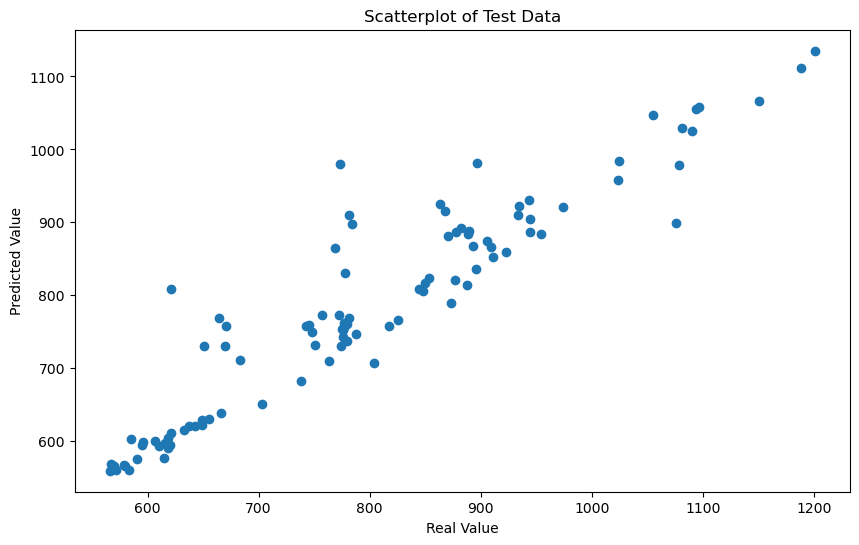

Epoch 1/20
7/7 [==============================] - 4s 34ms/step - loss: 0.0084
Epoch 2/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0051
Epoch 3/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0036
Epoch 4/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0023
Epoch 5/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0016
Epoch 6/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0011
Epoch 7/20
7/7 [==============================] - 0s 31ms/step - loss: 7.5552e-04
Epoch 8/20
7/7 [==============================] - 0s 28ms/step - loss: 7.2461e-04
Epoch 9/20
7/7 [==============================] - 0s 29ms/step - loss: 6.2804e-04
Epoch 10/20
7/7 [==============================] - 0s 33ms/step - loss: 5.9633e-04
Epoch 11/20
7/7 [==============================] - 0s 30ms/step - loss: 5.0632e-04
Epoch 12/20
7/7 [==============================] - 0s 37ms/step - loss: 4.1116e-04
Epoch 13/20
7/7 [====================

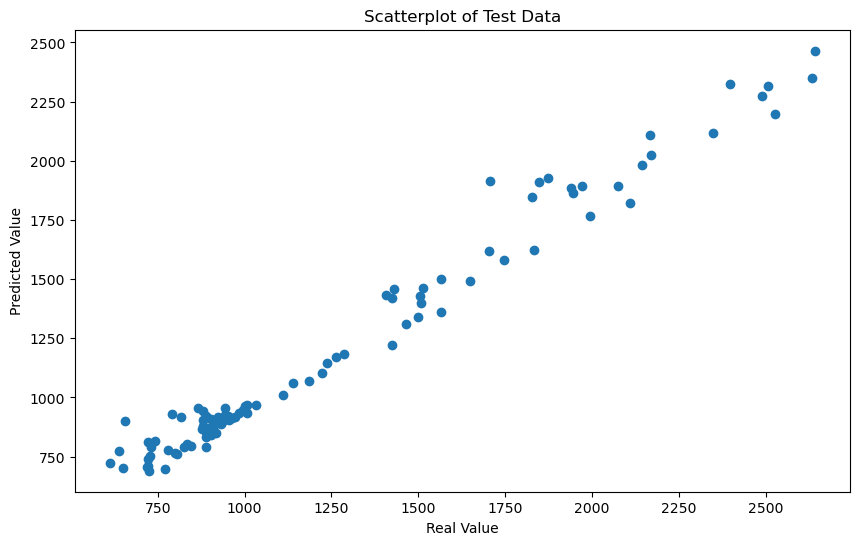

Epoch 1/20
7/7 [==============================] - 5s 31ms/step - loss: 0.0174
Epoch 2/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0085
Epoch 3/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0071
Epoch 4/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0038
Epoch 5/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0019
Epoch 6/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0017
Epoch 7/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0016
Epoch 8/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0013
Epoch 9/20
7/7 [==============================] - 0s 32ms/step - loss: 9.7296e-04
Epoch 10/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0011
Epoch 11/20
7/7 [==============================] - 0s 33ms/step - loss: 9.5501e-04
Epoch 12/20
7/7 [==============================] - 0s 32ms/step - loss: 8.0936e-04
Epoch 13/20
7/7 [==============================] 

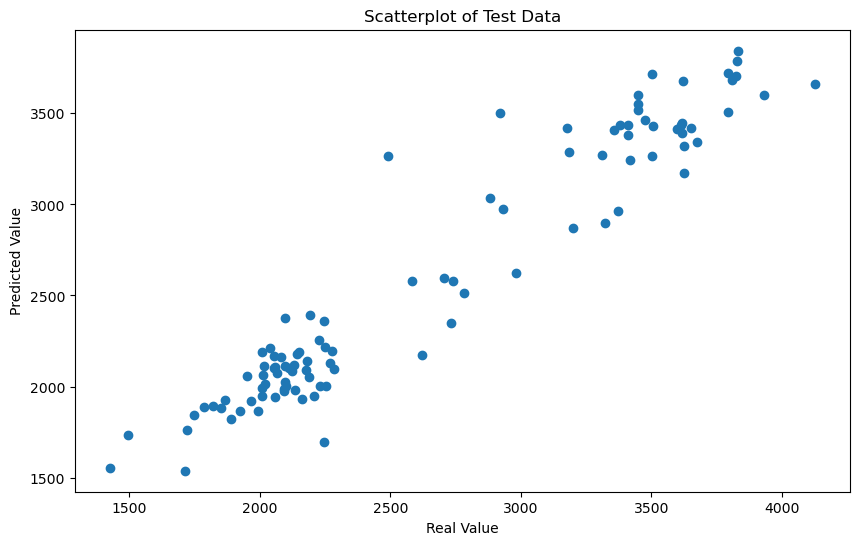

Epoch 1/20
7/7 [==============================] - 4s 37ms/step - loss: 0.0031
Epoch 2/20
7/7 [==============================] - 0s 40ms/step - loss: 0.0017
Epoch 3/20
7/7 [==============================] - 0s 44ms/step - loss: 0.0011
Epoch 4/20
7/7 [==============================] - 0s 38ms/step - loss: 6.9276e-04
Epoch 5/20
7/7 [==============================] - 0s 37ms/step - loss: 6.4816e-04
Epoch 6/20
7/7 [==============================] - 0s 35ms/step - loss: 6.1363e-04
Epoch 7/20
7/7 [==============================] - 0s 30ms/step - loss: 5.0126e-04
Epoch 8/20
7/7 [==============================] - 0s 30ms/step - loss: 4.1636e-04
Epoch 9/20
7/7 [==============================] - 0s 35ms/step - loss: 4.0350e-04
Epoch 10/20
7/7 [==============================] - 0s 36ms/step - loss: 3.0525e-04
Epoch 11/20
7/7 [==============================] - 0s 37ms/step - loss: 2.8839e-04
Epoch 12/20
7/7 [==============================] - 0s 36ms/step - loss: 3.0284e-04
Epoch 13/20
7/7 [========

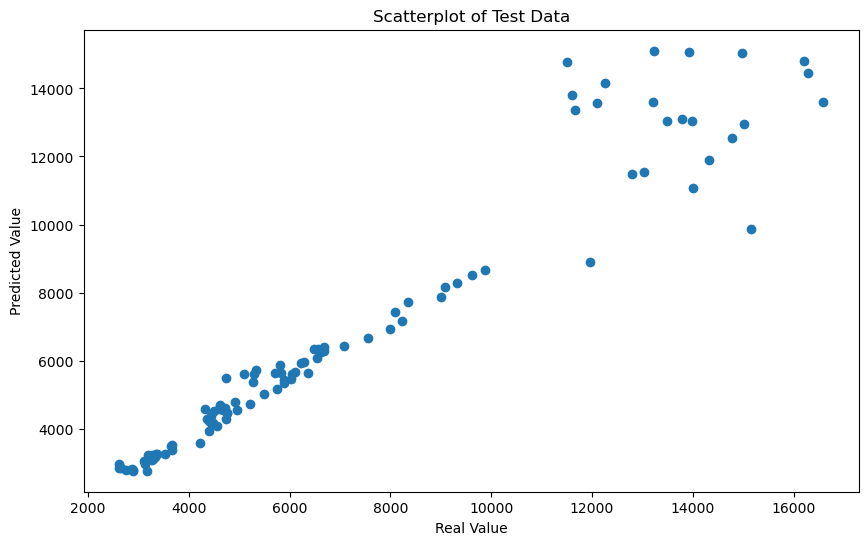

Epoch 1/20
7/7 [==============================] - 4s 31ms/step - loss: 0.0357
Epoch 2/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0149
Epoch 3/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0049
Epoch 4/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0041
Epoch 5/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0030
Epoch 6/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0027
Epoch 7/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0027
Epoch 8/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0020
Epoch 9/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0020
Epoch 10/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0017
Epoch 11/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0016
Epoch 12/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0017
Epoch 13/20
7/7 [==============================] - 0s 32ms/st

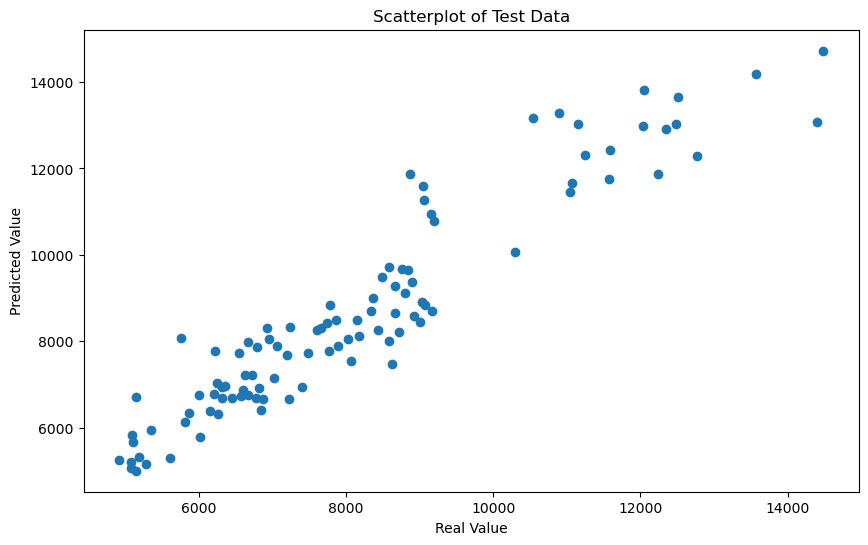

Epoch 1/20
7/7 [==============================] - 4s 33ms/step - loss: 0.0746
Epoch 2/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0311
Epoch 3/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0170
Epoch 4/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0080
Epoch 5/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0039
Epoch 6/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0033
Epoch 7/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0038
Epoch 8/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0027
Epoch 9/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0029
Epoch 10/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0028
Epoch 11/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0025
Epoch 12/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0024
Epoch 13/20
7/7 [==============================] - 0s 35ms/st

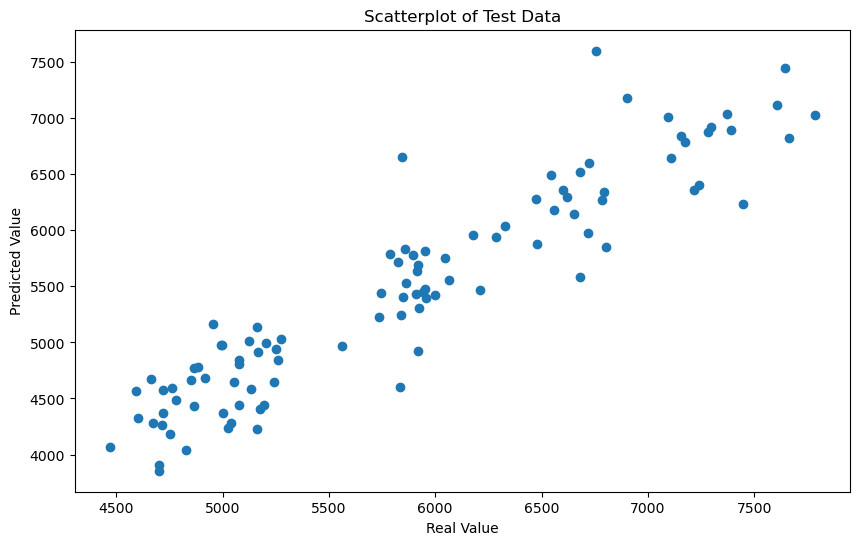

Epoch 1/20
7/7 [==============================] - 5s 39ms/step - loss: 0.0550
Epoch 2/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0208
Epoch 3/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0151
Epoch 4/20
7/7 [==============================] - 0s 40ms/step - loss: 0.0079
Epoch 5/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0058
Epoch 6/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0035
Epoch 7/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0031
Epoch 8/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0030
Epoch 9/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0030
Epoch 10/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0026
Epoch 11/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0027
Epoch 12/20
7/7 [==============================] - 0s 44ms/step - loss: 0.0029
Epoch 13/20
7/7 [==============================] - 0s 35ms/st

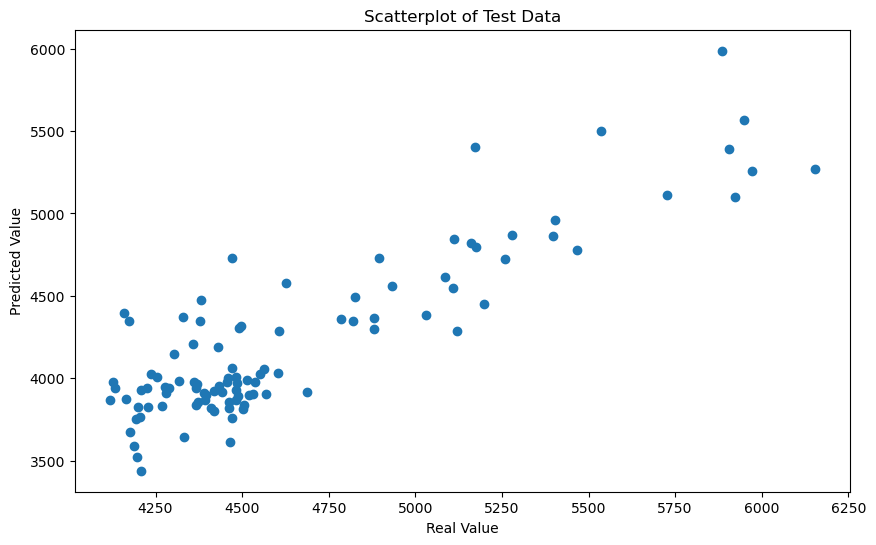

Epoch 1/20
7/7 [==============================] - 5s 35ms/step - loss: 0.0621
Epoch 2/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0246
Epoch 3/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0132
Epoch 4/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0101
Epoch 5/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0068
Epoch 6/20
7/7 [==============================] - 0s 43ms/step - loss: 0.0050
Epoch 7/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0034
Epoch 8/20
7/7 [==============================] - 0s 40ms/step - loss: 0.0028
Epoch 9/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0029
Epoch 10/20
7/7 [==============================] - 0s 44ms/step - loss: 0.0027
Epoch 11/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0025
Epoch 12/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0028
Epoch 13/20
7/7 [==============================] - 0s 44ms/st

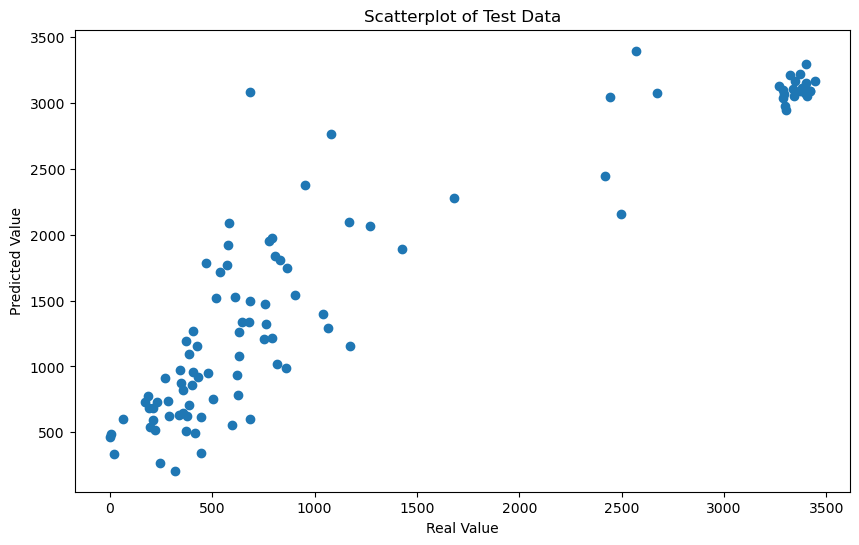

Epoch 1/20
7/7 [==============================] - 4s 37ms/step - loss: 0.0327
Epoch 2/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0135
Epoch 3/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0098
Epoch 4/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0068
Epoch 5/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0042
Epoch 6/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0026
Epoch 7/20
7/7 [==============================] - 0s 41ms/step - loss: 0.0022
Epoch 8/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0021
Epoch 9/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0021
Epoch 10/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0019
Epoch 11/20
7/7 [==============================] - 0s 43ms/step - loss: 0.0021
Epoch 12/20
7/7 [==============================] - 0s 40ms/step - loss: 0.0021
Epoch 13/20
7/7 [==============================] - 0s 38ms/st

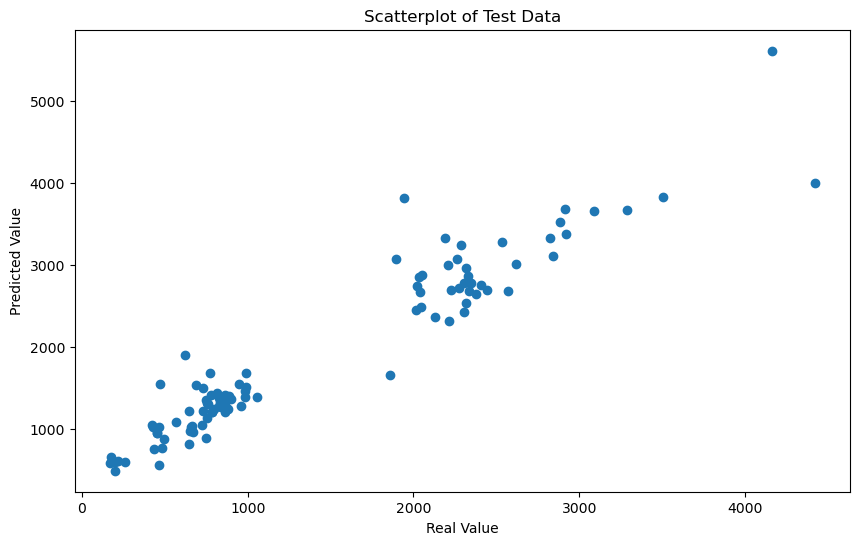

Epoch 1/20
7/7 [==============================] - 5s 32ms/step - loss: 0.0447
Epoch 2/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0160
Epoch 3/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0144
Epoch 4/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0085
Epoch 5/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0059
Epoch 6/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0048
Epoch 7/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0026
Epoch 8/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0017
Epoch 9/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0016
Epoch 10/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0015
Epoch 11/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0014
Epoch 12/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0014
Epoch 13/20
7/7 [==============================] - 0s 31ms/st

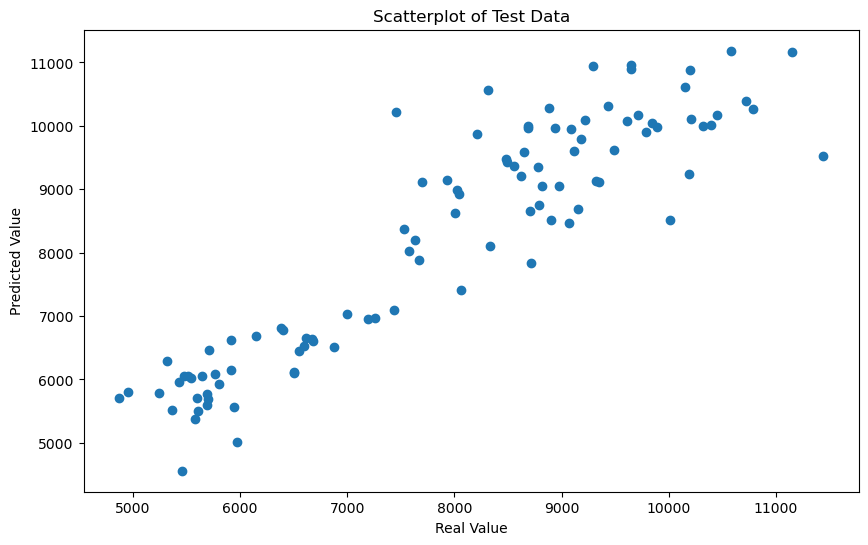

Epoch 1/20
7/7 [==============================] - 4s 34ms/step - loss: 0.0801
Epoch 2/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0360
Epoch 3/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0213
Epoch 4/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0104
Epoch 5/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0068
Epoch 6/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0041
Epoch 7/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0030
Epoch 8/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0032
Epoch 9/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0024
Epoch 10/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0025
Epoch 11/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0025
Epoch 12/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0023
Epoch 13/20
7/7 [==============================] - 0s 34ms/st

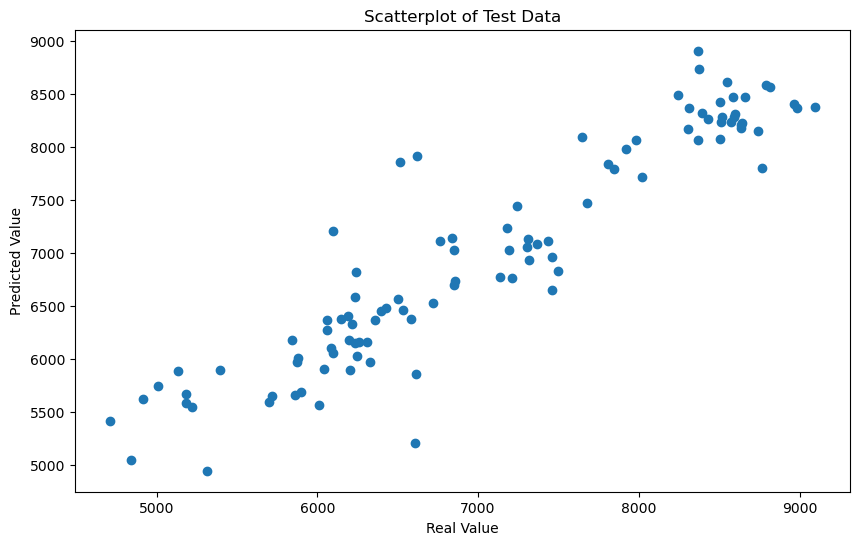

Epoch 1/20
7/7 [==============================] - 4s 33ms/step - loss: 0.1213
Epoch 2/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0441
Epoch 3/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0252
Epoch 4/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0146
Epoch 5/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0100
Epoch 6/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0054
Epoch 7/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0035
Epoch 8/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0038
Epoch 9/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0037
Epoch 10/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0033
Epoch 11/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0031
Epoch 12/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0030
Epoch 13/20
7/7 [==============================] - 0s 38ms/st

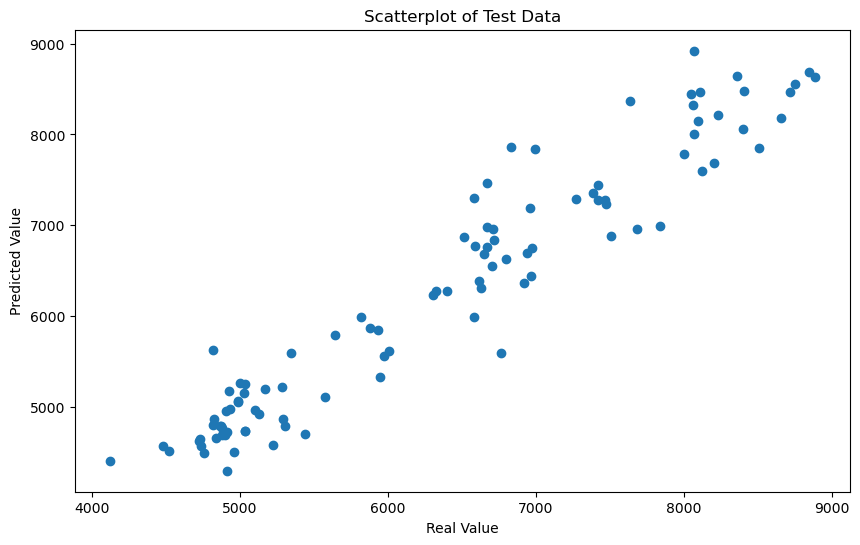

Epoch 1/20
7/7 [==============================] - 5s 31ms/step - loss: 0.1095
Epoch 2/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0389
Epoch 3/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0244
Epoch 4/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0149
Epoch 5/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0123
Epoch 6/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0087
Epoch 7/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0062
Epoch 8/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0046
Epoch 9/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0034
Epoch 10/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0034
Epoch 11/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0029
Epoch 12/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0029
Epoch 13/20
7/7 [==============================] - 0s 33ms/st

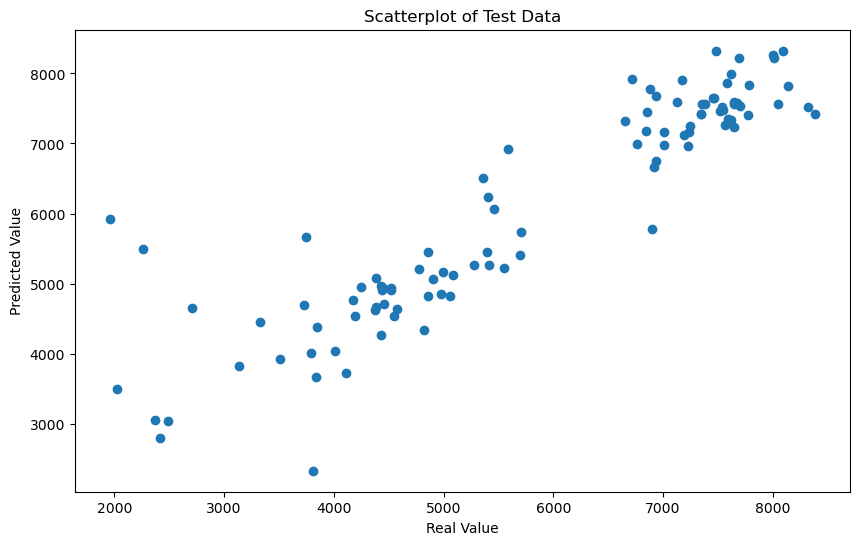

Epoch 1/20
7/7 [==============================] - 5s 35ms/step - loss: 0.1441
Epoch 2/20
7/7 [==============================] - 0s 43ms/step - loss: 0.0411
Epoch 3/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0188
Epoch 4/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0156
Epoch 5/20
7/7 [==============================] - 0s 44ms/step - loss: 0.0128
Epoch 6/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0105
Epoch 7/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0088
Epoch 8/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0082
Epoch 9/20
7/7 [==============================] - 0s 41ms/step - loss: 0.0079
Epoch 10/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0072
Epoch 11/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0070
Epoch 12/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0061
Epoch 13/20
7/7 [==============================] - 0s 42ms/st

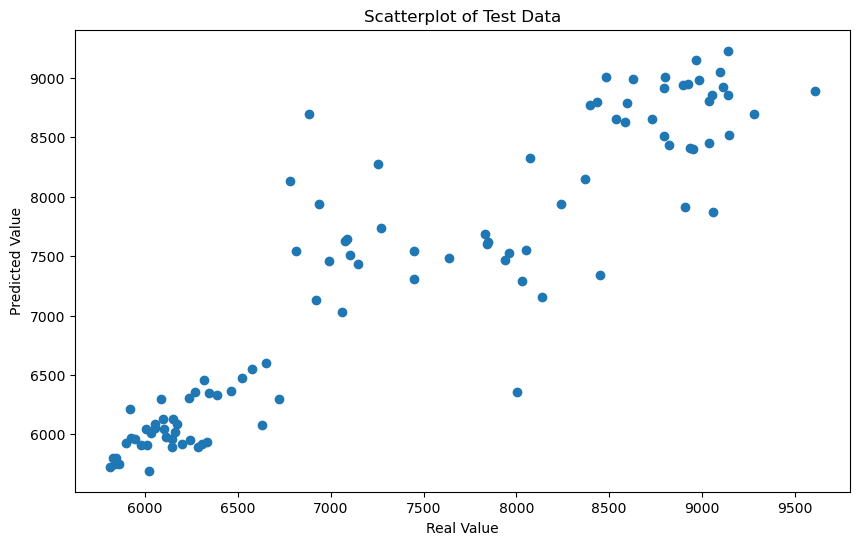

Epoch 1/20
7/7 [==============================] - 4s 37ms/step - loss: 0.0144
Epoch 2/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0040
Epoch 3/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0039
Epoch 4/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0027
Epoch 5/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0023
Epoch 6/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0022
Epoch 7/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0020
Epoch 8/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0017
Epoch 9/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0018
Epoch 10/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0016
Epoch 11/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0014
Epoch 12/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0013
Epoch 13/20
7/7 [==============================] - 0s 35ms/st

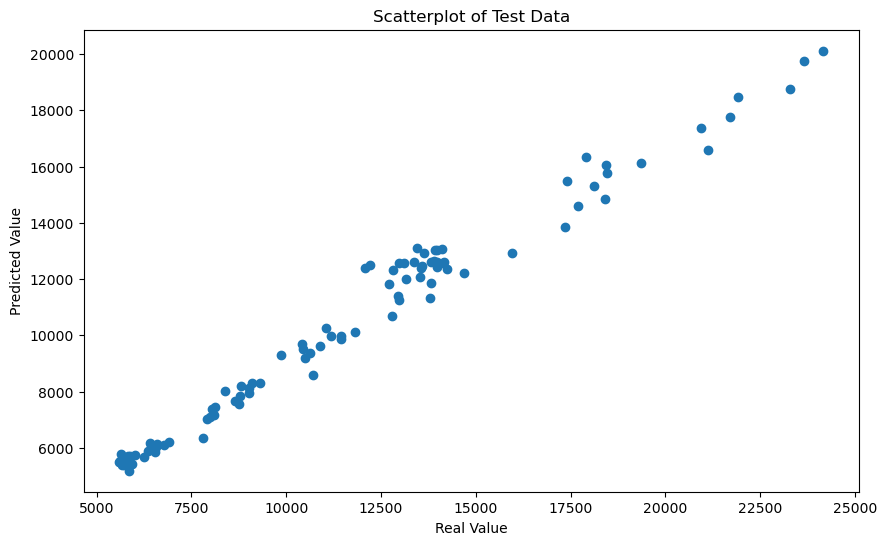

Epoch 1/20
7/7 [==============================] - 5s 34ms/step - loss: 0.0065
Epoch 2/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0047
Epoch 3/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0033
Epoch 4/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0025
Epoch 5/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0018
Epoch 6/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0014
Epoch 7/20
7/7 [==============================] - 0s 41ms/step - loss: 0.0011
Epoch 8/20
7/7 [==============================] - 0s 38ms/step - loss: 7.5811e-04
Epoch 9/20
7/7 [==============================] - 0s 36ms/step - loss: 5.9830e-04
Epoch 10/20
7/7 [==============================] - 0s 32ms/step - loss: 7.0474e-04
Epoch 11/20
7/7 [==============================] - 0s 40ms/step - loss: 5.7246e-04
Epoch 12/20
7/7 [==============================] - 0s 37ms/step - loss: 4.7376e-04
Epoch 13/20
7/7 [========================

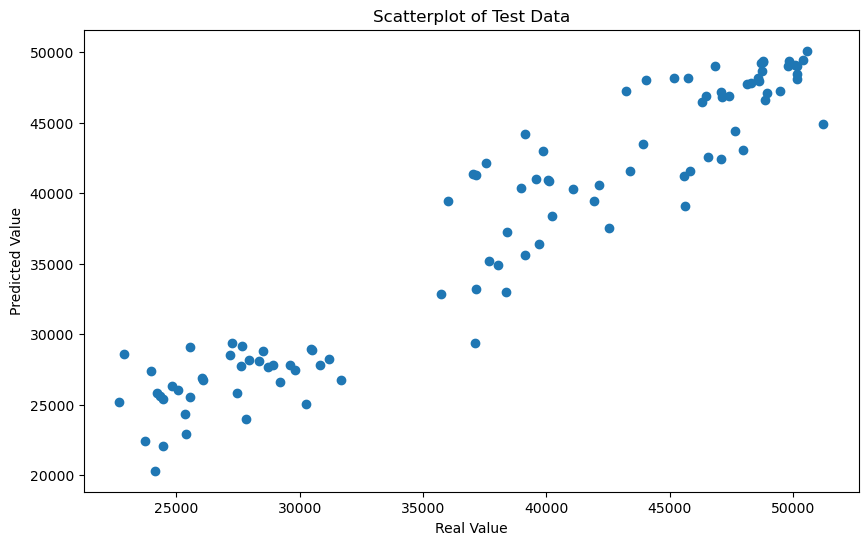

Epoch 1/20
7/7 [==============================] - 5s 37ms/step - loss: 0.0784
Epoch 2/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0325
Epoch 3/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0206
Epoch 4/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0065
Epoch 5/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0029
Epoch 6/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0033
Epoch 7/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0023
Epoch 8/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0023
Epoch 9/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0017
Epoch 10/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0020
Epoch 11/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0019
Epoch 12/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0017
Epoch 13/20
7/7 [==============================] - 0s 35ms/st

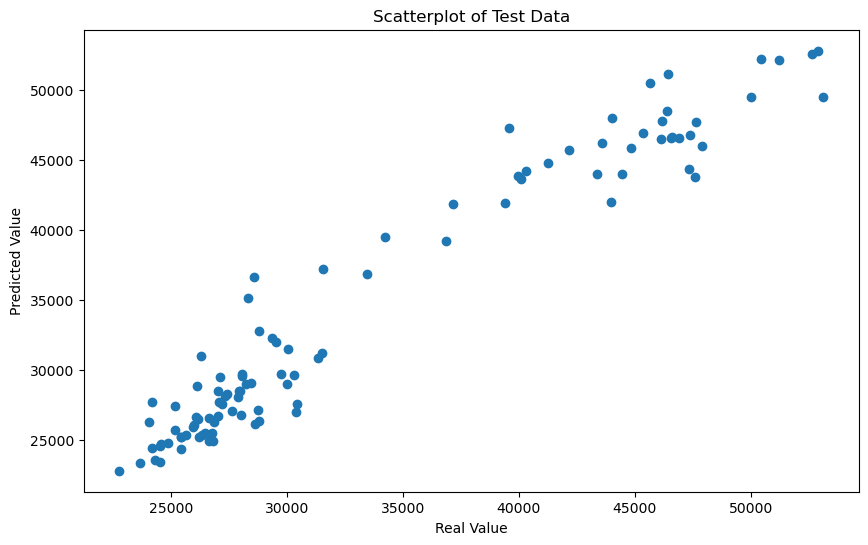

Epoch 1/20
7/7 [==============================] - 4s 32ms/step - loss: 0.0915
Epoch 2/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0346
Epoch 3/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0183
Epoch 4/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0078
Epoch 5/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0033
Epoch 6/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0038
Epoch 7/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0034
Epoch 8/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0026
Epoch 9/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0025
Epoch 10/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0024
Epoch 11/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0024
Epoch 12/20
7/7 [==============================] - 0s 42ms/step - loss: 0.0026
Epoch 13/20
7/7 [==============================] - 0s 38ms/st

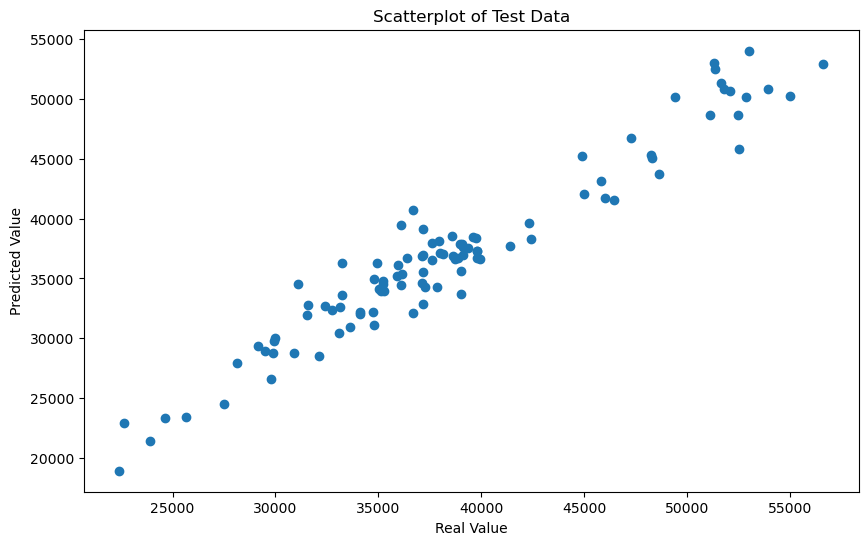

Epoch 1/20
7/7 [==============================] - 4s 29ms/step - loss: 0.1111
Epoch 2/20
7/7 [==============================] - 0s 28ms/step - loss: 0.0429
Epoch 3/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0275
Epoch 4/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0183
Epoch 5/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0129
Epoch 6/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0096
Epoch 7/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0057
Epoch 8/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0040
Epoch 9/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0033
Epoch 10/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0037
Epoch 11/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0032
Epoch 12/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0030
Epoch 13/20
7/7 [==============================] - 0s 30ms/st

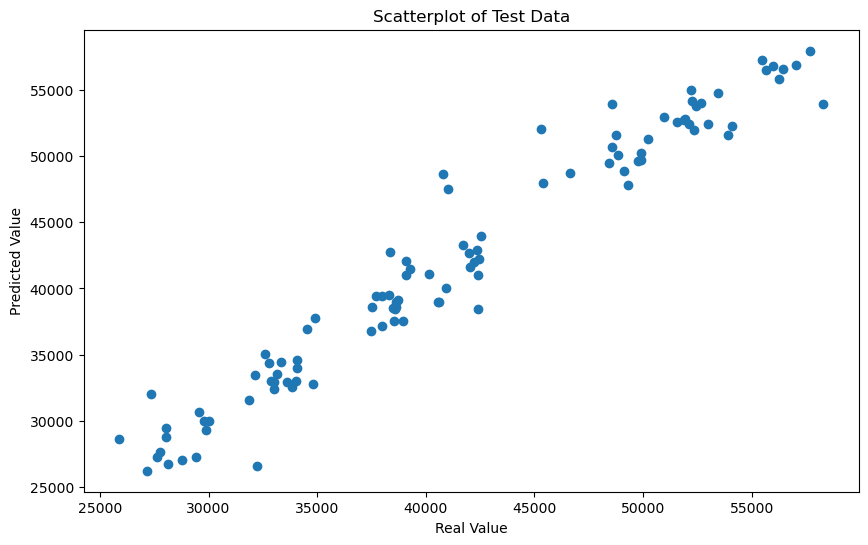

Epoch 1/20
7/7 [==============================] - 5s 34ms/step - loss: 0.1060
Epoch 2/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0435
Epoch 3/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0313
Epoch 4/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0225
Epoch 5/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0180
Epoch 6/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0121
Epoch 7/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0079
Epoch 8/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0059
Epoch 9/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0048
Epoch 10/20
7/7 [==============================] - 0s 38ms/step - loss: 0.0048
Epoch 11/20
7/7 [==============================] - 0s 39ms/step - loss: 0.0052
Epoch 12/20
7/7 [==============================] - 0s 40ms/step - loss: 0.0048
Epoch 13/20
7/7 [==============================] - 0s 37ms/st

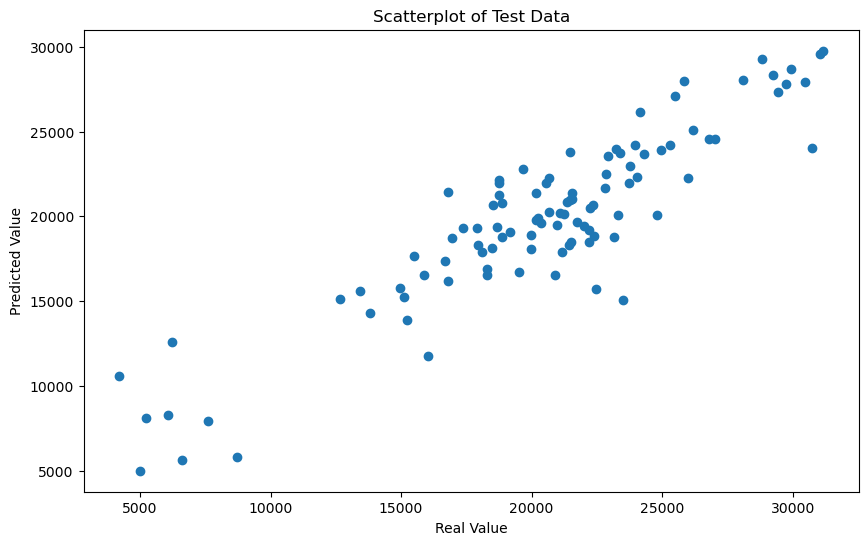

Epoch 1/20
7/7 [==============================] - 4s 31ms/step - loss: 0.1419
Epoch 2/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0460
Epoch 3/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0233
Epoch 4/20
7/7 [==============================] - 0s 34ms/step - loss: 0.0171
Epoch 5/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0144
Epoch 6/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0110
Epoch 7/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0111
Epoch 8/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0088
Epoch 9/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0083
Epoch 10/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0070
Epoch 11/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0070
Epoch 12/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0062
Epoch 13/20
7/7 [==============================] - 0s 31ms/st

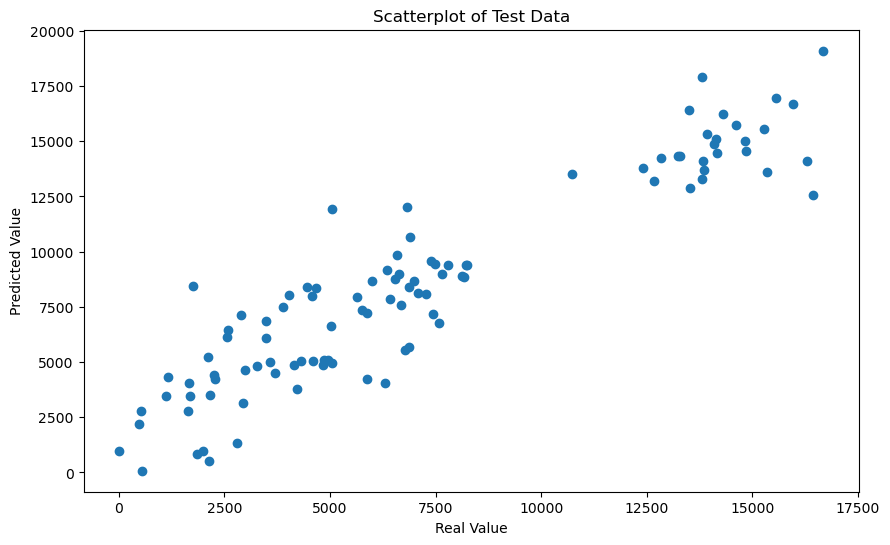

Epoch 1/20
7/7 [==============================] - 4s 30ms/step - loss: 0.1357
Epoch 2/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0376
Epoch 3/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0227
Epoch 4/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0170
Epoch 5/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0143
Epoch 6/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0118
Epoch 7/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0091
Epoch 8/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0080
Epoch 9/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0055
Epoch 10/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0042
Epoch 11/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0037
Epoch 12/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0033
Epoch 13/20
7/7 [==============================] - 0s 30ms/st

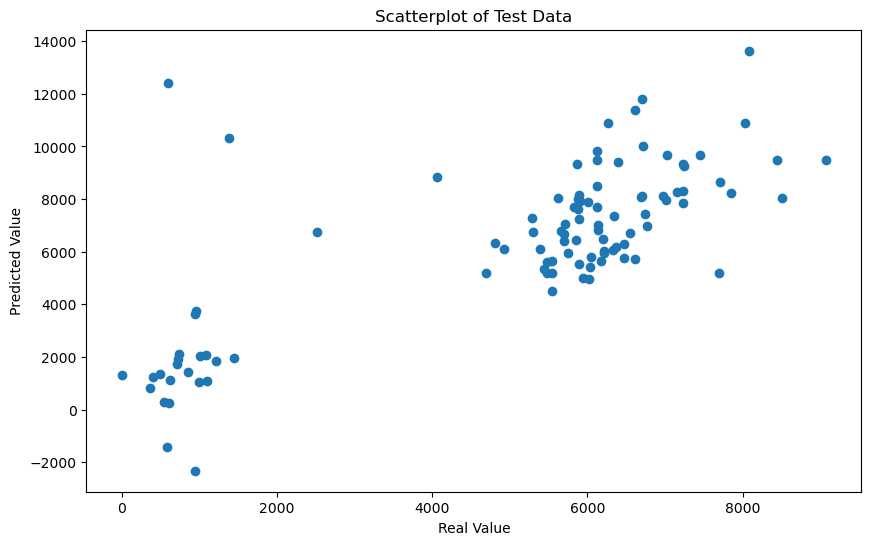

Epoch 1/20
7/7 [==============================] - 4s 29ms/step - loss: 0.0682
Epoch 2/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0298
Epoch 3/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0243
Epoch 4/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0141
Epoch 5/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0088
Epoch 6/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0043
Epoch 7/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0030
Epoch 8/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0032
Epoch 9/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0031
Epoch 10/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0026
Epoch 11/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0022
Epoch 12/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0023
Epoch 13/20
7/7 [==============================] - 0s 32ms/st

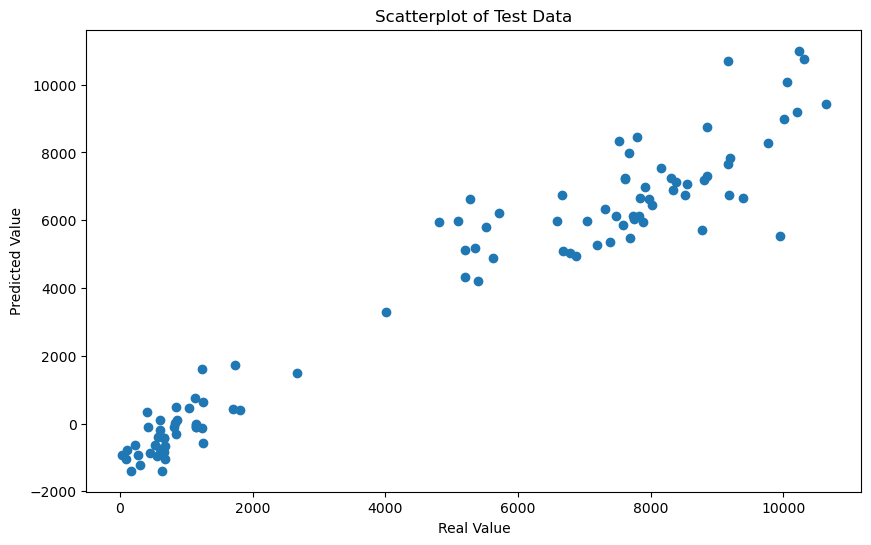

Epoch 1/20
7/7 [==============================] - 4s 28ms/step - loss: 0.0670
Epoch 2/20
7/7 [==============================] - 0s 28ms/step - loss: 0.0339
Epoch 3/20
7/7 [==============================] - 0s 30ms/step - loss: 0.0223
Epoch 4/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0126
Epoch 5/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0060
Epoch 6/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0037
Epoch 7/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0038
Epoch 8/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0033
Epoch 9/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0031
Epoch 10/20
7/7 [==============================] - 0s 29ms/step - loss: 0.0028
Epoch 11/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0035
Epoch 12/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0031
Epoch 13/20
7/7 [==============================] - 0s 30ms/st

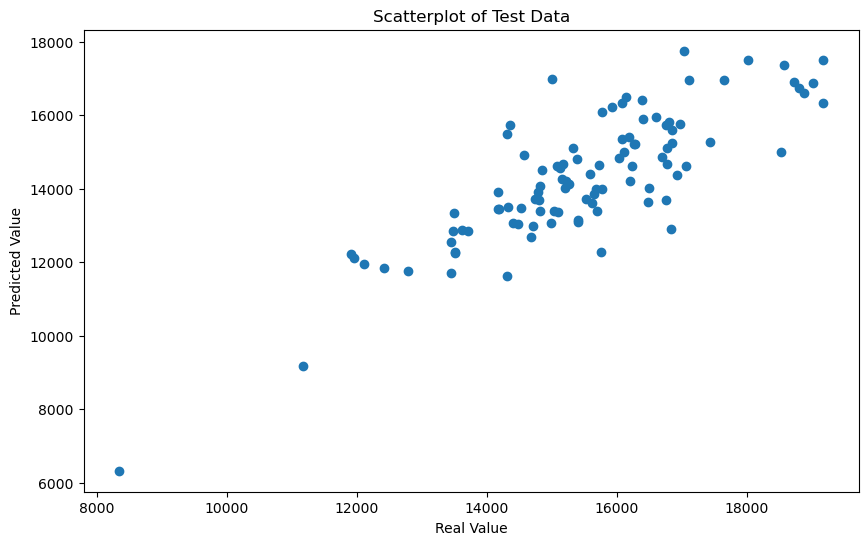

Epoch 1/20
7/7 [==============================] - 4s 30ms/step - loss: 0.1077
Epoch 2/20
7/7 [==============================] - 0s 31ms/step - loss: 0.0470
Epoch 3/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0309
Epoch 4/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0224
Epoch 5/20
7/7 [==============================] - 0s 36ms/step - loss: 0.0179
Epoch 6/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0142
Epoch 7/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0105
Epoch 8/20
7/7 [==============================] - 0s 35ms/step - loss: 0.0076
Epoch 9/20
7/7 [==============================] - 0s 37ms/step - loss: 0.0063
Epoch 10/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0057
Epoch 11/20
7/7 [==============================] - 0s 33ms/step - loss: 0.0065
Epoch 12/20
7/7 [==============================] - 0s 32ms/step - loss: 0.0058
Epoch 13/20
7/7 [==============================] - 0s 31ms/st

IndexError: index 3285 is out of bounds for axis 0 with size 3285

In [51]:
# Call the function with your 'final' DataFrame
RNN_model = train_and_evaluate_gruA(final)

### Model B 
With StandardScaler

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

def train_and_evaluate_gru_with_standard_scalerB(dataframe):
    """
    Train and evaluate a GRU-based model for Bitcoin price prediction using StandardScaler.

    Parameters:
    - dataframe: DataFrame containing Bitcoin price and related features.

    Returns:
    - None
    """

    # Loop over the data with a sliding window approach
    # Start the loop from (len(final) - 2701) and iterate to the end with steps of 100.
    for i in range((len(dataframe) - 2701), len(dataframe), 100):
        # Extract input and target data
        X = dataframe.iloc[i - 500:i, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
        Y = dataframe.iloc[i - 499:i + 1:, [4]]

        # Scale the data using StandardScaler
        scaler = StandardScaler()
        maxFactor = Y.max().values[0]
        X_scaled = scaler.fit_transform(X.to_numpy())
        Y_scaled = scaler.fit_transform(Y.to_numpy())

        # Split the data into training and test sets
        X_train = X_scaled[:400]
        X_test = X_scaled[400:]
        Y_train = Y_scaled[:400]
        Y_test = Y_scaled[400:]

        # Create a sequential Keras model
        model = Sequential()

        # Add a GRU layer with 100 units, input shape, and specific GRU configurations
        model.add(GRU(100, input_shape=(X_train.shape[1], 1), reset_after=True, recurrent_activation='sigmoid', return_sequences=True))

        # Add another GRU layer with similar configurations
        model.add(GRU(100, reset_after=True, recurrent_activation='sigmoid'))

        # Add dropout with a rate of 20% to prevent overfitting
        model.add(Dropout(0.2))

        # Add a dense output layer
        model.add(Dense(1))

        # Compile the model with mean squared error loss and Adam optimizer
        model.compile(loss='mean_squared_error', optimizer='adam')
    
    
        # Train the model
        model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), Y_train, batch_size=64, epochs=20)


        # Make predictions on the test set
        Y_test_predicted = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

        # Calculate performance metrics
        mse = mean_squared_error(Y_test * maxFactor, Y_test_predicted * maxFactor)
        mae = mean_absolute_error(Y_test * maxFactor, Y_test_predicted * maxFactor)
        mape = mean_absolute_percentage_error(Y_test * maxFactor, Y_test_predicted * maxFactor)

        # Print model metrics
        print("Model metrics on the test set:")
        print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape}")
        print("____________________________________________________________________________")
        print("\n")

        # Plot the actual vs. predicted prices
        plt.figure(figsize=(10, 6))
        plt.scatter(x=(Y_test * maxFactor), y=(Y_test_predicted * maxFactor))
        plt.xlabel("Real Value")
        plt.ylabel("Predicted Value")
        plt.title("Scatterplot of Test Data")
        plt.show()
        
    # Print the value of the last predicted Bitcoin price
    last_predicted_price = Y_test_predicted[-1][0] * maxFactor
    print(f"The predicted Bitcoin price in euros for the next day is: {last_predicted_price}")

In [ ]:
# Call the function with your 'final' DataFrame
RNN_model = train_and_evaluate_gru_with_standard_scalerB(final)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense
predicted_values = []

# Loop over the data with a sliding window approach
# Start the loop from (len(final) - 2701) and iterate to the end with steps of 100.
for i in range((len(final) - 2701), len(final), 100):
    # Extract input and target data
    X = final.iloc[i - 500:i, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
    Y = final.iloc[i - 499:i + 1:, [4]]

    # Scale the data using Min-Max scaling
    scaler = MinMaxScaler()
    maxFactor = Y.max().values[0]
    X_scaled = scaler.fit_transform(X.to_numpy())
    Y_scaled = scaler.fit_transform(Y.to_numpy())

    # Split the data into training and test sets
    X_train = X_scaled[:400]
    X_test = X_scaled[400:]
    Y_train = Y_scaled[:400]
    Y_test = Y_scaled[400:]

    # Create a sequential Keras model
    model = Sequential()

    # Add a GRU layer with 100 units, input shape, and specific GRU configurations
    model.add(GRU(100, input_shape=(X_train.shape[1], 1), reset_after=True, recurrent_activation='sigmoid', return_sequences=True))

    # Add another GRU layer with similar configurations
    model.add(GRU(100, reset_after=True, recurrent_activation='sigmoid'))

    # Add dropout with a rate of 20% to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer
    model.add(Dense(1))

    # Compile the model with mean squared error loss and Adam optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), Y_train, batch_size=64, epochs=20)

    # Make predictions on the test set
    Y_test_predicted = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
    predicted_values.extend(Y_test_predicted.flatten() * maxFactor)

    # Calculate performance metrics
    mse = mean_squared_error(Y_test * maxFactor, Y_test_predicted * maxFactor)
    mae = mean_absolute_error(Y_test * maxFactor, Y_test_predicted * maxFactor)
    mape = mean_absolute_percentage_error(Y_test * maxFactor, Y_test_predicted * maxFactor)

    # Print model metrics
    print("Model metrics on the test set:")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")
    print("____________________________________________________________________________")
    print("\n")

    # Plot the actual vs. predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(x=(Y_test * maxFactor), y=(Y_test_predicted * maxFactor))
    plt.xlabel("Real Value")
    plt.ylabel("Predicted Value")
    plt.title("Scatterplot of Test Data")
    plt.show()

# Print the value of the last predicted Bitcoin price
last_predicted_price = Y_test_predicted[-1][0] * maxFactor
print(f"The predicted Bitcoin price in euros for the next day is: {last_predicted_price}")


Epoch 1/20
7/7 [==============================] - 4s 20ms/step - loss: 0.1134
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0435
Epoch 3/20
7/7 [==============================] - 0s 19ms/step - loss: 0.0246
Epoch 4/20
7/7 [==============================] - 0s 18ms/step - loss: 0.0160
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.0117
Epoch 6/20
7/7 [==============================] - 0s 19ms/step - loss: 0.0075
Epoch 7/20
7/7 [==============================] - 0s 18ms/step - loss: 0.0043
Epoch 8/20
7/7 [==============================] - 0s 18ms/step - loss: 0.0031
Epoch 9/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0033
Epoch 10/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0028
Epoch 11/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0030
Epoch 12/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0025
Epoch 13/20
7/7 [==============================] - 0s 17ms/st

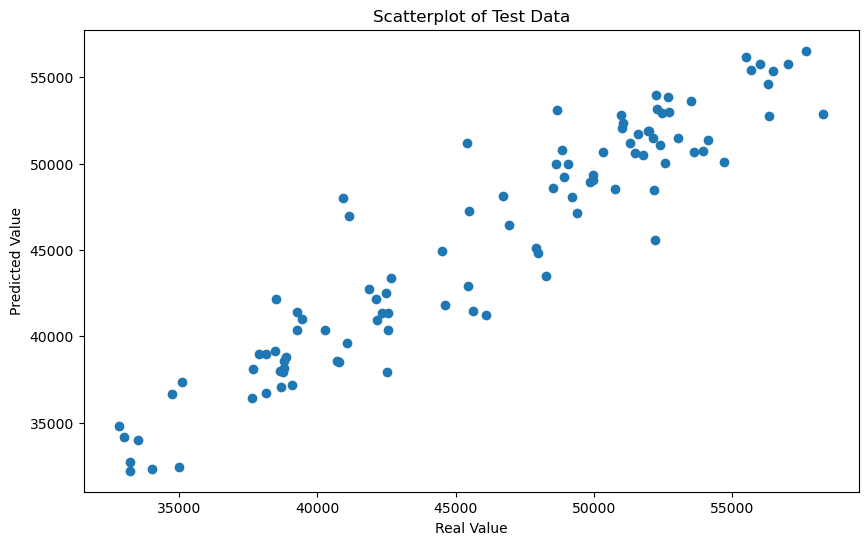

ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by MinMaxScaler.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense

# Filtra el DataFrame "final" para incluir solo datos hasta el 1 de febrero de 2022
final_filtered = final.loc[:'2022-02-01']

predicted_values = []

# Loop sobre los datos filtrados hasta el 1 de febrero de 2022
for i in range((len(final_filtered) - 2701), len(final_filtered), 100):
    # Extract input and target data
    X = final_filtered.iloc[i - 500:i, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
    Y = final_filtered.iloc[i - 499:i + 1:, [4]]

    # Scale the data using Min-Max scaling
    scaler = MinMaxScaler()
    maxFactor = Y.max().values[0]
    X_scaled = scaler.fit_transform(X.to_numpy())
    Y_scaled = scaler.fit_transform(Y.to_numpy())

    # Split the data into training and test sets
    X_train = X_scaled[:400]
    X_test = X_scaled[400:]
    Y_train = Y_scaled[:400]
    Y_test = Y_scaled[400:]

    # Create a sequential Keras model
    model = Sequential()

    # Add a GRU layer with 100 units, input shape, and specific GRU configurations
    model.add(GRU(100, input_shape=(X_train.shape[1], 1), reset_after=True, recurrent_activation='sigmoid', return_sequences=True))

    # Add another GRU layer with similar configurations
    model.add(GRU(100, reset_after=True, recurrent_activation='sigmoid'))

    # Add dropout with a rate of 20% to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer
    model.add(Dense(1))

    # Compile the model with mean squared error loss and Adam optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), Y_train, batch_size=64, epochs=20)

    # Make predictions on the test set
    Y_test_predicted = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
    predicted_values.extend(Y_test_predicted.flatten() * maxFactor)

    # Calculate performance metrics
    mse = mean_squared_error(Y_test * maxFactor, Y_test_predicted * maxFactor)
    mae = mean_absolute_error(Y_test * maxFactor, Y_test_predicted * maxFactor)
    mape = mean_absolute_percentage_error(Y_test * maxFactor, Y_test_predicted * maxFactor)

    # Print model metrics
    print("Model metrics on the test set:")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")
    print("____________________________________________________________________________")
    print("\n")

    # Plot the actual vs. predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(x=(Y_test * maxFactor), y=(Y_test_predicted * maxFactor))
    plt.xlabel("Real Value")
    plt.ylabel("Predicted Value")
    plt.title("Scatterplot of Test Data")
    plt.show()

# Print the value of the last predicted Bitcoin price
last_predicted_price = Y_test_predicted[-1][0] * maxFactor
print(f"The predicted Bitcoin price in euros for the next day is: {last_predicted_price}")


In [ ]:
# Supongamos que tienes los datos reales en la variable Y_real.

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener los índices de las muestras que no tienen valores NaN en BTC_NextDPrice
indices = df[df["BTC_NextDPrice"].notna()].index

# Graficar la serie de tiempo BTC_AdjClose en azul
ax.plot(indices, df.loc[df["BTC_NextDPrice"].notna(), "BTC_AdjClose"], label='BTC_AdjClose', color='blue')

# Graficar la serie de tiempo BTC_NextDPrice en naranja
ax.plot(indices, df.loc[df["BTC_NextDPrice"].notna(), "BTC_NextDPrice"], label='BTC_SGD_predicted', color='orange')

# Graficar los valores predichos en verde
ax.plot(indices, predicted_values, label='BTC_RNN_predicted', color='green')

# Configurar etiquetas de los ejes y el título
ax.set_xlabel('Días')
ax.set_ylabel('Precio')
ax.set_title('Comparación de BTC_AdjClose, BTC_NextDPrice y Predicciones')

# Mostrar una leyenda para diferenciar las líneas
ax.legend()

# Mostrar la gráfica
plt.show()


In [ ]:
# Supongamos que tienes los datos reales en la variable Y_real.

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Filtrar los índices y datos para el período de 2022 a 2023
filtro_periodo = (indices >= '2022-01-01') & (indices <= '2023-12-31')
indices_periodo = indices[filtro_periodo]

# Graficar la serie de tiempo BTC_AdjClose en azul
ax.plot(indices_periodo, df.loc[filtro_periodo, "BTC_AdjClose"], label='BTC_AdjClose', color='blue')

# Graficar la serie de tiempo BTC_NextDPrice en naranja
ax.plot(indices_periodo, df.loc[filtro_periodo, "BTC_NextDPrice"], label='BTC_NextDPrice', color='orange')

# Graficar los valores predichos en verde
ax.plot(indices_periodo, predicted_values[filtro_periodo], label='BTC_RNN_predicted', color='green')

# Configurar etiquetas de los ejes y el título
ax.set_xlabel('Días')
ax.set_ylabel('Precio')
ax.set_title('Comparación de BTC_AdjClose, BTC_NextDPrice y Predicciones (2022-2023)')

# Mostrar una leyenda para diferenciar las líneas
ax.legend()

# Mostrar la gráfica
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense



# Loop over the data with a sliding window approach
# Start the loop from (len(final) - 2701) and iterate to the end with steps of 100.
for i in range((len(datafram) - 2701), len(datafram), 100):
    # Extract input and target data
    X = datafram.iloc[i - 500:i, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
    Y = datafram.iloc[i - 499:i + 1:, [4]]

    # Scale the data using StandardScaler
    scaler = StandardScaler()
    maxFactor = Y.max().values[0]
    X_scaled = scaler.fit_transform(X.to_numpy())
    Y_scaled = scaler.fit_transform(Y.to_numpy())

    # Split the data into training and test sets
    X_train = X_scaled[:400]
    X_test = X_scaled[400:]
    Y_train = Y_scaled[:400]
    Y_test = Y_scaled[400:]

    # Create a sequential Keras model
    model = Sequential()

    # Add a GRU layer with 100 units, input shape, and specific GRU configurations
    model.add(GRU(100, input_shape=(X_train.shape[1], 1), reset_after=True, recurrent_activation='sigmoid', return_sequences=True))

    # Add another GRU layer with similar configurations
    model.add(GRU(100, reset_after=True, recurrent_activation='sigmoid'))

    # Add dropout with a rate of 20% to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer
    model.add(Dense(1))

    # Compile the model with mean squared error loss and Adam optimizer
    model.compile(loss='mean_squared_error', optimizer='adam')


    # Train the model
    model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), Y_train, batch_size=64, epochs=20)


    # Make predictions on the test set
    Y_test_predicted = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))

    # Calculate performance metrics
    mse = mean_squared_error(Y_test * maxFactor, Y_test_predicted * maxFactor)
    mae = mean_absolute_error(Y_test * maxFactor, Y_test_predicted * maxFactor)
    mape = mean_absolute_percentage_error(Y_test * maxFactor, Y_test_predicted * maxFactor)

    # Print model metrics
    print("Model metrics on the test set:")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")
    print("____________________________________________________________________________")
    print("\n")

    # Plot the actual vs. predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(x=(Y_test * maxFactor), y=(Y_test_predicted * maxFactor))
    plt.xlabel("Real Value")
    plt.ylabel("Predicted Value")
    plt.title("Scatterplot of Test Data")
    plt.show()

# Print the value of the last predicted Bitcoin price
last_predicted_price = Y_test_predicted[-1][0] * maxFactor
print(f"The predicted Bitcoin price in euros for the next day is: {last_predicted_price}")

In [ ]:
predicted_valuesA

In [ ]:
 predicted_values

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que tienes los datos de BTC_AdjClose y BTC_NextDPrice en las variables Y_test y Y_test_predicted respectivamente.

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener los índices de las muestras que no tienen valores NaN en BTC_NextDPrice
indices = df[df["BTC_NextDPrice"].notna()].index

# Graficar la serie de tiempo BTC_AdjClose en azul
ax.plot(indices, df.loc[df["BTC_NextDPrice"].notna(),"BTC_AdjClose"], label='BTC_AdjClose', color='blue')

# Graficar la serie de tiempo BTC_NextDPrice en naranja
ax.plot(indices, df.loc[df["BTC_NextDPrice"].notna(),"BTC_NextDPrice"], label='BTC_NextDPrice', color='orange')

# Configurar etiquetas de los ejes y el título
ax.set_xlabel('Días')
ax.set_ylabel('Precio')
ax.set_title('Comparación de BTC_AdjClose y BTC_NextDPrice')

# Mostrar una leyenda para diferenciar las líneas
ax.legend()

# Mostrar la gráfica
plt.show()


In [ ]:
# Supongamos que tienes los datos reales en la variable Y_real.

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener los índices de las muestras que no tienen valores NaN en BTC_NextDPrice
indices = df[df["BTC_NextDPrice"].notna()].index

# Graficar la serie de tiempo BTC_AdjClose en azul
ax.plot(indices, df.loc[df["BTC_NextDPrice"].notna(), "BTC_AdjClose"], label='BTC_AdjClose', color='blue')

# Graficar la serie de tiempo BTC_NextDPrice en naranja
ax.plot(indices, df.loc[df["BTC_NextDPrice"].notna(), "BTC_NextDPrice"], label='BTC_NextDPrice', color='orange')

# Graficar los valores predichos por el primer modelo en verde
ax.plot(indices, predicted_values, label='Predicted (Model 1)', color='green')

# Graficar los valores predichos por el segundo modelo en rojo
ax.plot(indices, predicted_valuesA, label='Predicted (Model 2)', color='red')

# Configurar etiquetas de los ejes y el título
ax.set_xlabel('Días')
ax.set_ylabel('Precio')
ax.set_title('Comparación de BTC_AdjClose, BTC_NextDPrice y Predicciones')

# Mostrar una leyenda para diferenciar las líneas
ax.legend()

# Mostrar la gráfica
plt.show()
